In [1]:
import sys
import math
import os
import random
from os import path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg
import MDAnalysis as mda
import MDAnalysis.transformations
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import rmsd
from MDAnalysis.analysis.rms import RMSF

/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-tqdm-4.64.1-wf5nozuyrgtk6pdmuhvq3ppgomvod2mi/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-biopython-1.81-rp3d4wtjjssaceevj6ubbjvapaixoop3/lib/python3.9/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# paths and vars 

# working dir on LC
mainFolder="/p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models"
cdir=mainFolder+"/13_analysis"

sims_linked=mainFolder+"/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts_fix_nucleotides_attach_RAS_RAF"
sims_nucl  =mainFolder+"/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts_fix_nucleotides" 
sims_full  =mainFolder+"/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full" 
sims_part  =mainFolder+"/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts" 
ref_structure =sims_part+"/lipids-water-em.gro" 

os.chdir(cdir)
os.getcwd()


'/p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_analysis'

In [3]:
# Load referances and get selections
uni_ref = mda.Universe(ref_structure)

# KRAS index 1 to 452
atoms_ref_kras_bb         = uni_ref.select_atoms("name BB and index 0:451")
atoms_ref_kras_bb_gdomain = uni_ref.select_atoms("name BB and index 0:393") # Residue 2 to 170
#print(f'length {len(atoms_ref_kras_bb.atoms)} \n ouput {atoms_ref_kras_bb.atoms} \n {atoms_ref_kras_bb.positions}') 

# BRAF index 453 to 1819
atoms_ref_braf_bb    = uni_ref.select_atoms("name BB and index 452:1818")
atoms_ref_braf_rbd   = uni_ref.select_atoms("name BB and index 452:618")   # Residue 156 to 228
atoms_ref_braf_crd   = uni_ref.select_atoms("name BB and index 637:740")   # Residue 237 to 275
atoms_ref_braf_loop1 = uni_ref.select_atoms("name BB and index 753:928")   # Residue 282 to 359
atoms_ref_braf_loop2 = uni_ref.select_atoms("name BB and index 955:1116")  # Residue 371 to 448 # note 8 residue loop 2 ext not included 
atoms_ref_braf_kd    = uni_ref.select_atoms("name BB and index 1136:1768") # Residue 457 to 723 
#print(f'length {len(atoms_ref_braf_bb.atoms)} \n ouput {atoms_ref_braf_bb.atoms} \n {atoms_ref_braf_bb.positions}') 

# 14_3_3 index 1820 to 1897
atoms_ref_14_3_3_bb          = uni_ref.select_atoms("name BB and index 1819:2896")
atoms_ref_14_3_3_bb_S729_CR3 = uni_ref.select_atoms("name BB and index 1819:2357") # Residue 1 to 230 
atoms_ref_14_3_3_bb_S365_CR2 = uni_ref.select_atoms("name BB and index 2358:2896") # Residue 1 to 230 
#print(f'length {len(atoms_ref_14_3_3_bb.atoms)} \n ouput {atoms_ref_14_3_3_bb.atoms} \n {atoms_ref_14_3_3_bb.positions}') 


/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarnin

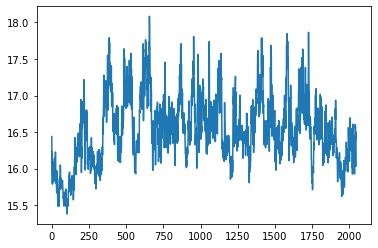

In [22]:
# test reading one sim - not used
tprSim = sims_nucl + "/run_t03_2/topol.tpr"
xtcSim = sims_nucl + "/run_t03_2/traj_comp.xtc"

# Load test RAS-only sim 
#name = "1ras.pfpatch_000000597137"
#cSim = mda.Universe(tprSim, xtcSim)
#Get error with tpr likely need newer MDAnalysis version of GROMACS 2023.01
cSim = mda.Universe(ref_structure, xtcSim, in_memory=True) # this works

# ADD new segment with all protiens (not as we load with .gro only SYSTEM is pre-loaded)
# Segment dose not work needs to be Framgent those are generated looks ot be complicated to change
#aprotein_fragment = cSim.add_Fragments(fragid='APROTEINS')
#aprotein_segment = cSim.add_Segment(segid='APROTEINS')
#aprotein_atoms = cSim.select_atoms('index 0:2896') # all protein residues
#aprotein_atoms.residues.segments = aprotein_segment


# KRAS index 1 to 452
atoms_cSim_kras_bb         = cSim.select_atoms("name BB and index 0:451")
atoms_cSim_kras_bb_gdomain = cSim.select_atoms("name BB and index 0:393") # Residue 2 to 170

'''
# BRAF index 453 to 1819
atoms_cSim_braf_bb    = cSim.select_atoms("name BB and index 452:1818")
atoms_cSim_braf_rbd   = cSim.select_atoms("name BB and index 452:618")   # Residue 156 to 228
atoms_cSim_braf_crd   = cSim.select_atoms("name BB and index 637:740")   # Residue 237 to 275
atoms_cSim_braf_loop1 = cSim.select_atoms("name BB and index 753:928")   # Residue 282 to 359
atoms_cSim_braf_loop2 = cSim.select_atoms("name BB and index 955:1116")  # Residue 371 to 448 # note 8 residue loop 2 ext not included 
atoms_cSim_braf_kd    = cSim.select_atoms("name BB and index 1136:1768") # Residue 457 to 723 

# 14_3_3 index 1820 to 1897
atoms_cSim_14_3_3_bb = cSim.select_atoms("name BB and index 1819:2896")
atoms_cSim_14_3_3_bb_S729_CR3 = cSim.select_atoms("name BB and index 1819:2357") # Residue 1 to 230 
atoms_cSim_14_3_3_bb_S365_CR2 = cSim.select_atoms("name BB and index 2358:2896") # Residue 1 to 230 
'''

# Test alignment 

# 1) Center on KRAS CYF BB
# 2) translate up in z axes 
# 3) wrap all particles into the box 
atoms_cSim_kras_CYF_bb  = cSim.select_atoms("index 430") # Get CYF BB atom index 431
#atoms_cSim_proteins = cSim.select_atoms("index 0:2896")
cSim.atoms.write('test_tranform_inital.gro')
# MDAnalysis.transformations.unwrap(atoms_cSim_proteins), 
transforms = [MDAnalysis.transformations.center_in_box(atoms_cSim_kras_CYF_bb),
              MDAnalysis.transformations.translate([0,0,70]),
              MDAnalysis.transformations.wrap(cSim.atoms)]
cSim.trajectory.add_transformations(*transforms)

cSim.atoms.write('test_tranform_after.gro')

# results = checkOverlapp(cSim, name)
#print(results)
#np.save(os.path.join(cdir, f"{name}_results.npy"), results)
rgyr = np.zeros([len(cSim.trajectory),2], dtype= float)
i=0
for ts in cSim.trajectory:
    rgyr[i,0] = cSim.trajectory.time / 1000
    rgyr[i,1] = atoms_cSim_kras_bb.radius_of_gyration()
    i=i+1
plt.plot(rgyr[:,0], rgyr[:,1])


In [23]:
# test run rgyr for one simulation - not used
array_rgyr = np.zeros([len(cSim.trajectory),10], dtype= float)
array_rgyr_name = np.array(['KRAS', 'BRAF-all', 'BRAF-RBD', 'BRAF-CRD', 'BRAF-loop1', 'BRAF-loop2', 'BRAF-KD', '14_3_3-S729', '14_3_3-S365'])
array_rgyr.shape
i=0
for ts in cSim.trajectory:
    array_rgyr[i,0] = cSim.trajectory.time / 1000 # in ns 
    array_rgyr[i,1] = atoms_cSim_kras_bb.radius_of_gyration()
    array_rgyr[i,2] = atoms_cSim_braf_bb.radius_of_gyration()
    array_rgyr[i,3] = atoms_cSim_braf_rbd.radius_of_gyration()
    array_rgyr[i,4] = atoms_cSim_braf_crd.radius_of_gyration()
    array_rgyr[i,5] = atoms_cSim_braf_loop1.radius_of_gyration()
    array_rgyr[i,6] = atoms_cSim_braf_loop2.radius_of_gyration()
    array_rgyr[i,7] = atoms_cSim_braf_kd.radius_of_gyration()
    array_rgyr[i,8] = atoms_cSim_14_3_3_bb_S729_CR3.radius_of_gyration()
    array_rgyr[i,9] = atoms_cSim_14_3_3_bb_S365_CR2.radius_of_gyration()
    i+=1

In [21]:
# Test transforamtion not used 
cSim = mda.Universe(ref_structure, xtcSim, in_memory=True) # this works
x = cSim.select_atoms("index 430")
print(x.positions)
transforms = [MDAnalysis.transformations.center_in_box(x),
              MDAnalysis.transformations.translate([0,0,70]),
              MDAnalysis.transformations.wrap(cSim.atoms)]
cSim.trajectory.add_transformations(*transforms)
for ts in cSim.trajectory[0:10]:
    print(f"{x.positions} {ts.dimensions}")


[[113.3 125.4 132. ]]
[[144.7656  144.7656  162.04105]] [289.5312 289.5312 184.0821  90.      90.      90.    ]
[[139.48595 139.48595 169.02878]] [278.9719  278.9719  198.05757  90.       90.       90.     ]
[[138.36433 138.36433 170.58891]] [276.72867 276.72867 201.17783  90.       90.       90.     ]
[[138.21625 138.21625 170.7757 ]] [276.4325  276.4325  201.55139  90.       90.       90.     ]
[[137.85728 137.85728 171.40536]] [275.71457 275.71457 202.81075  90.       90.       90.     ]
[[138.03131 138.03131 171.13971]] [276.06262 276.06262 202.27943  90.       90.       90.     ]
[[138.30801 138.30801 170.73428]] [276.61603 276.61603 201.46857  90.       90.       90.     ]
[[138.06898 138.06898 171.03519]] [276.13797 276.13797 202.07037  90.       90.       90.     ]
[[137.83002 137.83002 171.35474]] [275.66003 275.66003 202.70949  90.       90.       90.     ]
[[137.95238 137.95238 171.13449]] [275.90475 275.90475 202.26897  90.       90.       90.     ]


In [27]:
# Read Rgyr data for x4 replicates 

# Read sims_nucl 
#cSimPath = sims_nucl
#name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts_fix_nucleotides"
cSimPath = sims_part
name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts"
#cSimPath = sims_full
#name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full"

# @NOTE also check use 
# /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts
# and same full run10fs1 to 4 in both both 10 fs and run for 500 ns 
# ref_structure likely needs to change 


array_rgyr_name = np.array(['KRAS', 'BRAF-all', 'BRAF-RBD', 'BRAF-CRD', 'BRAF-loop1', 'BRAF-loop2', 'BRAF-KD', '14_3_3-S729', '14_3_3-S365'])
array_rgyr = np.empty([4, 2100,10], dtype= float) # note 2100 needs to be <= len(cSim.trajectory) for all the simulations
array_rgyr[:] = np.nan
for s in range(4):
    #tprSim = cSimPath + f"/run_t03_{s+1}/topol.tpr"
    #xtcSim = cSimPath + f"/run_t03_{s+1}/traj_comp.xtc"
    tprSim = cSimPath + f"/run10fs{s+1}/topol.tpr"
    xtcSim = cSimPath + f"/run10fs{s+1}/traj_comp.xtc"
    print(f"Read i, tpr {tprSim}, xtc {xtcSim}")
    
    # Load test RAS-only sim 
    #name = "1ras.pfpatch_000000597137"
    #cSim = mda.Universe(tprSim, xtcSim)
    #Get error with tpr likely need newer MDAnalysis version of GROMACS 2023.01
    cSim = mda.Universe(ref_structure, xtcSim, n_memory=True) # this works

    # Align current traj 
    # 0) unwrap - not done as it's not supported by .gro read only .tpr
    # 1) Center on KRAS CYF BB
    # 2) translate up in z axes 
    # 3) wrap all particles into the box 
    atoms_cSim_kras_CYF_bb  = cSim.select_atoms("index 430") # Get CYF BB atom index 431
    # atoms_cSim_proteins = cSim.select_atoms("index 0:2896")
    # MDAnalysis.transformations.unwrap(atoms_cSim_proteins), # only works with fragments set (needs .tpr)
    transforms = [MDAnalysis.transformations.center_in_box(atoms_cSim_kras_CYF_bb),
                  MDAnalysis.transformations.translate([0,0,70]),
                  MDAnalysis.transformations.wrap(cSim.atoms)]
    cSim.trajectory.add_transformations(*transforms)
    
    # KRAS index 1 to 452
    atoms_cSim_kras_bb         = cSim.select_atoms("name BB and index 0:451")
    atoms_cSim_kras_bb_gdomain = cSim.select_atoms("name BB and index 0:393") # Residue 2 to 170

    # BRAF index 453 to 1819
    atoms_cSim_braf_bb    = cSim.select_atoms("name BB and index 452:1818")
    atoms_cSim_braf_rbd   = cSim.select_atoms("name BB and index 452:618")   # Residue 156 to 228
    atoms_cSim_braf_crd   = cSim.select_atoms("name BB and index 637:740")   # Residue 237 to 275
    atoms_cSim_braf_loop1 = cSim.select_atoms("name BB and index 753:928")   # Residue 282 to 359
    atoms_cSim_braf_loop2 = cSim.select_atoms("name BB and index 955:1116")  # Residue 371 to 448 # note 8 residue loop 2 ext not included 
    atoms_cSim_braf_kd    = cSim.select_atoms("name BB and index 1136:1768") # Residue 457 to 723 

    # 14_3_3 index 1820 to 1897
    atoms_cSim_14_3_3_bb = cSim.select_atoms("name BB and index 1819:2896")
    atoms_cSim_14_3_3_bb_S729_CR3 = cSim.select_atoms("name BB and index 1819:2357") # Residue 1 to 230 
    atoms_cSim_14_3_3_bb_S365_CR2 = cSim.select_atoms("name BB and index 2358:2896") # Residue 1 to 230 
    
    i=0
    for ts in cSim.trajectory:
        array_rgyr[s,i,0] = cSim.trajectory.time / 1000 # in ns 
        array_rgyr[s,i,1] = atoms_cSim_kras_bb.radius_of_gyration()
        array_rgyr[s,i,2] = atoms_cSim_braf_bb.radius_of_gyration()
        array_rgyr[s,i,3] = atoms_cSim_braf_rbd.radius_of_gyration()
        array_rgyr[s,i,4] = atoms_cSim_braf_crd.radius_of_gyration()
        array_rgyr[s,i,5] = atoms_cSim_braf_loop1.radius_of_gyration()
        array_rgyr[s,i,6] = atoms_cSim_braf_loop2.radius_of_gyration()
        array_rgyr[s,i,7] = atoms_cSim_braf_kd.radius_of_gyration()
        array_rgyr[s,i,8] = atoms_cSim_14_3_3_bb_S729_CR3.radius_of_gyration()
        array_rgyr[s,i,9] = atoms_cSim_14_3_3_bb_S365_CR2.radius_of_gyration()
        i+=1
    
np.savez(f"{name}_rgyr", rgyr=array_rgyr, rgyr_names=array_rgyr_name) # save in cwd 


Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs1/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs1/traj_comp.xtc


/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarnin

Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs2/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs2/traj_comp.xtc
Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs3/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs3/traj_comp.xtc
Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs4/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs4/traj_comp.xtc


<Figure size 1080x1440 with 0 Axes>

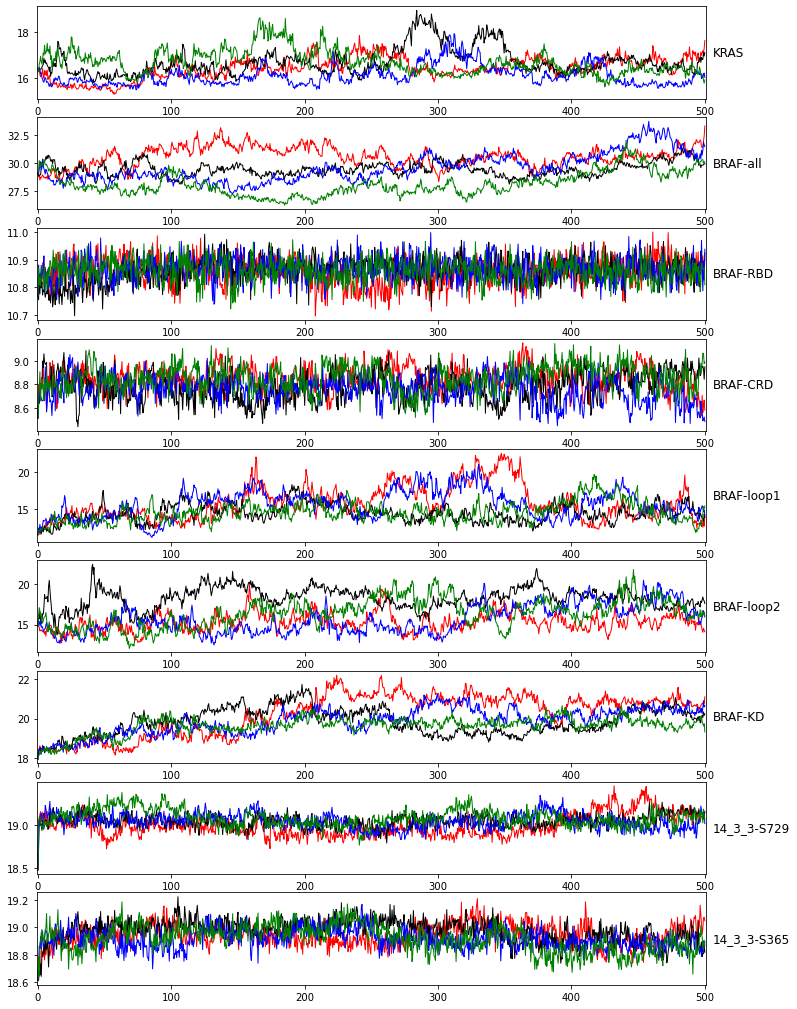

In [28]:
# plot combined
plt.figure(figsize=(15, 20))
fig, axs = plt.subplots(9, figsize=(12, 18))
colors = ['red', 'black', 'blue', 'green']
#x=array_rgyr[0,:,0]
x = np.arange(0,2100) / 2 # manual 0 to 2099 ns 
for i in range(9):
    for s in range(4):
        axs[i].plot(x, array_rgyr[s,:,i+1], lw=1, color=colors[s]);
    axs[i].text(1.01, 0.5, array_rgyr_name[i], va="center", ha="left", size=12, transform=axs[i].transAxes)
    #axs[i].set_xlim([-1, x.max()+1])
    axs[i].set_xlim([-1, 500+1])
fig.savefig(f"{name}_rgyr_01.eps", bbox_inches='tight')
fig.savefig(f"{name}_rgyr_01.pdf", bbox_inches='tight')


In [29]:
# calculate avg and sd
array_rgyr.shape
np.std(np.nanmean(array_rgyr[:,500:1000,2], axis=1))
for i in range(9):
    print(f"rgyr - {array_rgyr_name[i]:<11s} avg {np.nanmean(array_rgyr[:,500:1000,i+1]):5.2f} sd_avg {np.std(np.nanmean(array_rgyr[:,500:1000,i+1], axis=1)):.2f} sd_all {np.std(array_rgyr[:,500:1000,i+1]):.2f} - avg 250-500ns over all x4 repeats")
    

rgyr - KRAS        avg 16.56 sd_avg 0.26 sd_all 0.54 - avg 250-500ns over all x4 repeats
rgyr - BRAF-all    avg 29.77 sd_avg 0.78 sd_all 1.18 - avg 250-500ns over all x4 repeats
rgyr - BRAF-RBD    avg 10.86 sd_avg 0.00 sd_all 0.04 - avg 250-500ns over all x4 repeats
rgyr - BRAF-CRD    avg  8.81 sd_avg 0.05 sd_all 0.13 - avg 250-500ns over all x4 repeats
rgyr - BRAF-loop1  avg 15.43 sd_avg 0.95 sd_all 2.05 - avg 250-500ns over all x4 repeats
rgyr - BRAF-loop2  avg 16.89 sd_avg 0.98 sd_all 1.68 - avg 250-500ns over all x4 repeats
rgyr - BRAF-KD     avg 20.18 sd_avg 0.48 sd_all 0.62 - avg 250-500ns over all x4 repeats
rgyr - 14_3_3-S729 avg 19.04 sd_avg 0.02 sd_all 0.10 - avg 250-500ns over all x4 repeats
rgyr - 14_3_3-S365 avg 18.92 sd_avg 0.04 sd_all 0.09 - avg 250-500ns over all x4 repeats


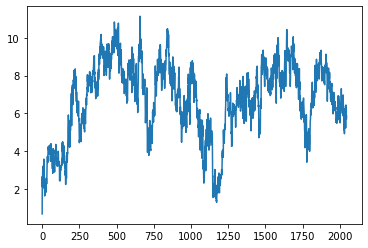

In [61]:
ref_structure =sims_part+"/lipids-water-em.gro" 

# test reading one sim - RMSD not used
tprSim = sims_nucl + "/run_t03_2/topol.tpr"
xtcSim = sims_nucl + "/run_t03_2/traj_comp.xtc"

# Load test RAS-only sim 
#name = "1ras.pfpatch_000000597137"
#cSim = mda.Universe(tprSim, xtcSim)
#Get error with tpr likely need newer MDAnalysis version of GROMACS 2023.01

# loads in gro and trajectory (xtc/trr)
cSim = mda.Universe(ref_structure, xtcSim, in_memory=True) # this works

# KRAS index 1 to 452
atoms_cSim_kras_bb         = cSim.select_atoms("name BB and index 0:451")
atoms_cSim_kras_bb_gdomain = cSim.select_atoms("name BB and index 0:393") # Residue 2 to 170

'''
# BRAF index 453 to 1819
atoms_cSim_braf_bb    = cSim.select_atoms("name BB and index 452:1818")
atoms_cSim_braf_rbd   = cSim.select_atoms("name BB and index 452:618")   # Residue 156 to 228
atoms_cSim_braf_crd   = cSim.select_atoms("name BB and index 637:740")   # Residue 237 to 275
atoms_cSim_braf_loop1 = cSim.select_atoms("name BB and index 753:928")   # Residue 282 to 359
atoms_cSim_braf_loop2 = cSim.select_atoms("name BB and index 955:1116")  # Residue 371 to 448 # note 8 residue loop 2 ext not included 
atoms_cSim_braf_kd    = cSim.select_atoms("name BB and index 1136:1768") # Residue 457 to 723 

# 14_3_3 index 1820 to 1897
atoms_cSim_14_3_3_bb = cSim.select_atoms("name BB and index 1819:2896")
atoms_cSim_14_3_3_bb_S729_CR3 = cSim.select_atoms("name BB and index 1819:2357") # Residue 1 to 230 
atoms_cSim_14_3_3_bb_S365_CR2 = cSim.select_atoms("name BB and index 2358:2896") # Residue 1 to 230 
'''

# Test alignment 

# 1) Center on KRAS CYF BB
# 2) translate up in z axes 
# 3) wrap all particles into the box 
atoms_cSim_kras_CYF_bb  = cSim.select_atoms("index 430") # Get CYF BB atom index 431
# good to include these 3 transforms
transforms = [trans.center_in_box(atoms_cSim_kras_CYF_bb),
              trans.translate([0,0,40]),
              trans.wrap(cSim.atoms)]
cSim.trajectory.add_transformations(*transforms)

# aligns all frames to the first frame
# Now when protein shoudl be all in - align on each solid part before RMSF 
aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 0:393", in_memory=True).run() # align on g-domain only

# for us: exclude the HVR region 


# results = checkOverlapp(cSim, name)
#print(results)
#np.save(os.path.join(cdir, f"{name}_results.npy"), results)
data = np.zeros([len(cSim.trajectory),2], dtype= float)
i=0
for ts in cSim.trajectory:
    #print(f" - cal RMSD frame {cSim.trajectory.time / 1000}")
    data[i,0] = cSim.trajectory.time / 1000
    data[i,1] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_kras_bb.positions, atoms_ref_kras_bb.positions, weights=None, center=False, superposition=False)
    #data[i,1] = atoms_cSim_kras_bb.radius_of_gyration()
    i=i+1
plt.plot(data[:,0], data[:,1])


In [13]:
# Read RMSD data for x4 replicates 

# Read sims_nucl 
#cSimPath = sims_nucl
#name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts_fix_nucleotides"

#cSimPath = sims_part
#name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts"
cSimPath = sims_full
name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full"

array_data_name = np.array(['KRAS', 'BRAF-all', 'BRAF-RBD', 'BRAF-CRD', 'BRAF-loop1', 'BRAF-loop2', 'BRAF-KD', '14_3_3-S729', '14_3_3-S365'])
array_data = np.empty([4, 2100,10], dtype= float) # note 2100 needs to be <= len(cSim.trajectory) for all the simulations
array_data[:] = np.nan
for s in range(4):
    #tprSim = cSimPath + f"/run_t03_{s+1}/topol.tpr"
    #xtcSim = cSimPath + f"/run_t03_{s+1}/traj_comp.xtc"
    tprSim = cSimPath + f"/run10fs{s+1}/topol.tpr"
    xtcSim = cSimPath + f"/run10fs{s+1}/traj_comp.xtc"
    print(f"Read i, tpr {tprSim}, xtc {xtcSim}")   
    
    # if data alreaddy computed use that 
    if os.path.isfile(f"{name}_rmsd_run_{s}.npz"):
        load_data = np.load(f"{name}_rmsd_run_{s}.npz", allow_pickle=True)
        array_data[s,:,:] = load_data['rmsd'][s,:,:]
    else:
        #Get error with tpr likely need newer MDAnalysis version of GROMACS 2023.01
        cSim = mda.Universe(ref_structure, xtcSim, n_memory=True) # this works

        # Align current traj 
        # 1) Center on KRAS CYF BB
        # 2) translate up in z axes 
        # 3) wrap all particles into the box 
        atoms_cSim_kras_CYF_bb  = cSim.select_atoms("index 430") # Get CYF BB atom index 431
        transforms = [MDAnalysis.transformations.center_in_box(atoms_cSim_kras_CYF_bb),
                      MDAnalysis.transformations.translate([0,0,70]),
                      MDAnalysis.transformations.wrap(cSim.atoms)]
        cSim.trajectory.add_transformations(*transforms)

        # KRAS index 1 to 452
        atoms_cSim_kras_bb         = cSim.select_atoms("name BB and index 0:451")
        atoms_cSim_kras_bb_gdomain = cSim.select_atoms("name BB and index 0:393") # Residue 2 to 170

        # BRAF index 453 to 1819
        atoms_cSim_braf_bb    = cSim.select_atoms("name BB and index 452:1818")
        atoms_cSim_braf_rbd   = cSim.select_atoms("name BB and index 452:618")   # Residue 156 to 228
        atoms_cSim_braf_crd   = cSim.select_atoms("name BB and index 637:740")   # Residue 237 to 275
        atoms_cSim_braf_loop1 = cSim.select_atoms("name BB and index 753:928")   # Residue 282 to 359
        atoms_cSim_braf_loop2 = cSim.select_atoms("name BB and index 955:1116")  # Residue 371 to 448 # note 8 residue loop 2 ext not included 
        atoms_cSim_braf_kd    = cSim.select_atoms("name BB and index 1136:1768") # Residue 457 to 723 

        # 14_3_3 index 1820 to 1897
        atoms_cSim_14_3_3_bb = cSim.select_atoms("name BB and index 1819:2896")
        atoms_cSim_14_3_3_bb_S729_CR3 = cSim.select_atoms("name BB and index 1819:2357") # Residue 1 to 230 
        atoms_cSim_14_3_3_bb_S365_CR2 = cSim.select_atoms("name BB and index 2358:2896") # Residue 1 to 230 

        #RMSD data in array_data_name
        # 0 is frame time 
        # 1 KRAS full - aligned on g-domain only 
        # 2 BRAF full - aligned on full 
        # 3 BRAF RBD  - aligned on RBD 
        # 4 BRAF CRD  - aligned on CRD 
        # 5 BRAF loop1 - aligned on full 
        # 6 BRAF loop2 - aligned on full
        # 7 BRAF KD - aligned on KD 
        # 8 14_3_3_S729_CR3 - aligned on 14_3_3_S729_CR3 
        # 9 14_3_3_S365_CR2 - aligned on 14_3_3_S365_CR2 

        print(f" - {s} RMSD 1 KRAS")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 0:393", in_memory=True).run() # align on g-domain only
        i=0
        for ts in cSim.trajectory:
            array_data[s,i,0] = cSim.trajectory.time / 1000
            array_data[s,i,1] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_kras_bb.positions, atoms_ref_kras_bb.positions, weights=None, center=False, superposition=False)
            i=i+1

        print(f" - {s} RMSD 1 BRAF full, loop1 and loop2")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 452:1818", in_memory=True).run() # align on BRAF full 
        i=0
        for ts in cSim.trajectory:
            array_data[s,i,2] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_braf_bb.positions, atoms_ref_braf_bb.positions, weights=None, center=False, superposition=False)
            array_data[s,i,5] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_braf_loop1.positions, atoms_ref_braf_loop1.positions, weights=None, center=False, superposition=False)
            array_data[s,i,6] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_braf_loop2.positions, atoms_ref_braf_loop2.positions, weights=None, center=False, superposition=False)
            i=i+1

        print(f" - {s} RMSD 3 BRAF RBD")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 452:618", in_memory=True).run() # align on BRAF RBD 
        i=0
        for ts in cSim.trajectory:
            array_data[s,i,3] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_braf_rbd.positions, atoms_ref_braf_rbd.positions, weights=None, center=False, superposition=False)
            i=i+1

        print(f" - {s} RMSD 4 BRAF CRD")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 637:740", in_memory=True).run() # align on BRAF CRD 
        i=0
        for ts in cSim.trajectory:
            array_data[s,i,4] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_braf_crd.positions, atoms_ref_braf_crd.positions, weights=None, center=False, superposition=False)
            i=i+1

        print(f" - {s} RMSD 7 BRAF KD")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 1136:1768", in_memory=True).run() # align on BRAF KD 
        i=0
        for ts in cSim.trajectory:
            array_data[s,i,7] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_braf_kd.positions, atoms_ref_braf_kd.positions, weights=None, center=False, superposition=False)
            i=i+1

        print(f" - {s} RMSD 8 14_3_3_S729_CR3")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 1819:2357", in_memory=True).run() # align on 14_3_3_S729_CR3
        i=0
        for ts in cSim.trajectory:
            array_data[s,i,8] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_14_3_3_bb_S729_CR3.positions, atoms_ref_14_3_3_bb_S729_CR3.positions, weights=None, center=False, superposition=False)
            i=i+1

        print(f" - {s} RMSD 9 14_3_3_S365_CR2")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 2358:2896", in_memory=True).run() # align on 14_3_3_S365_CR2
        i=0
        for ts in cSim.trajectory:
            array_data[s,i,9] = MDAnalysis.analysis.rms.rmsd(atoms_cSim_14_3_3_bb_S365_CR2.positions, atoms_ref_14_3_3_bb_S365_CR2.positions, weights=None, center=False, superposition=False)
            i=i+1

        np.savez(f"{name}_rmsd_run_{s}", rmsd=array_data, rmsd_names=array_data_name) # save in cwd 
    
np.savez(f"{name}_rmsd_all", rmsd=array_data, rmsd_names=array_data_name) # save in cwd 


Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full/run10fs1/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full/run10fs1/traj_comp.xtc


/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarnin

 - 0 RMSD 1 KRAS
 - 0 RMSD 1 BRAF full, loop1 and loop2
 - 0 RMSD 3 BRAF RBD
 - 0 RMSD 4 BRAF CRD
 - 0 RMSD 7 BRAF KD
 - 0 RMSD 8 14_3_3_S729_CR3
 - 0 RMSD 9 14_3_3_S365_CR2
Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full/run10fs2/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full/run10fs2/traj_comp.xtc
 - 1 RMSD 1 KRAS
 - 1 RMSD 1 BRAF full, loop1 and loop2
 - 1 RMSD 3 BRAF RBD
 - 1 RMSD 4 BRAF CRD
 - 1 RMSD 7 BRAF KD
 - 1 RMSD 8 14_3_3_S729_CR3
 - 1 RMSD 9 14_3_3_S365_CR2
Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full/run10fs3/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full/run10fs3/traj_comp.xtc
 - 2 RMSD 1 KRAS
 - 2 RMSD 1 BRAF full, loop1 and loop2
 - 2 RMSD 3 BR

<Figure size 1080x1440 with 0 Axes>

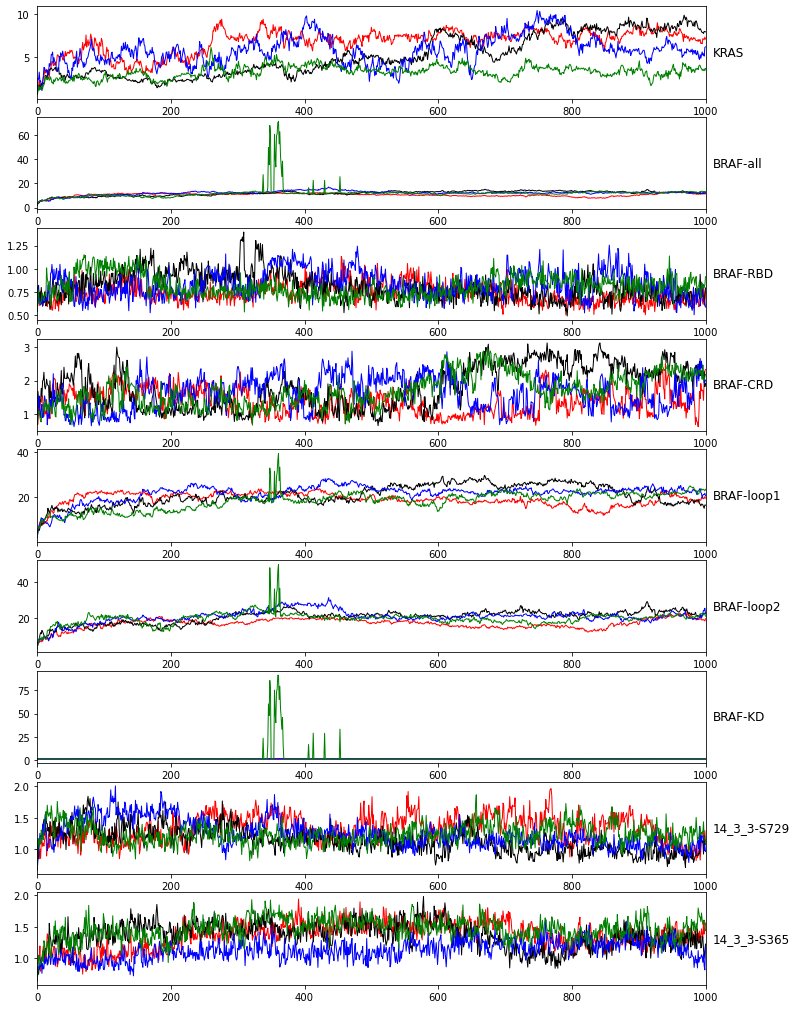

In [14]:
# plot combined RMSD
plt.figure(figsize=(15, 20))
fig, axs = plt.subplots(9, figsize=(12, 18))
colors = ['red', 'black', 'blue', 'green']
#x=array_rgyr[0,:,0]
x = np.arange(0,2100) # manual 0 to 2099 ns 
for i in range(9):
    for s in range(4):
        axs[i].plot(x, array_data[s,:,i+1], lw=1, color=colors[s]);
    axs[i].text(1.01, 0.5, array_data_name[i], va="center", ha="left", size=12, transform=axs[i].transAxes)
    #axs[i].set_xlim([-1, x.max()])
    axs[i].set_xlim([-1, 1001])
fig.savefig(f"{name}_rmsd_01.eps", bbox_inches='tight')
fig.savefig(f"{name}_rmsd_01.pdf", bbox_inches='tight')


In [15]:
# calculate avg and sd
array_data.shape
np.std(np.nanmean(array_data[:,500:1000,2], axis=1))
for i in range(9):
    print(f"RMSD - {array_data_name[i]:<11s} avg {np.nanmean(array_data[:,500:1000,i+1]):5.2f} sd_avg {np.std(np.nanmean(array_data[:,500:1000,i+1], axis=1)):.2f} sd_all {np.std(array_data[:,500:1000,i+1]):.2f} - avg 250-500ns over all x4 repeats")
    

RMSD - KRAS        avg  6.12 sd_avg 1.61 sd_all 2.01 - avg 250-500ns over all x4 repeats
RMSD - BRAF-all    avg 11.82 sd_avg 1.15 sd_all 1.38 - avg 250-500ns over all x4 repeats
RMSD - BRAF-RBD    avg  0.77 sd_avg 0.05 sd_all 0.12 - avg 250-500ns over all x4 repeats
RMSD - BRAF-CRD    avg  1.78 sd_avg 0.34 sd_all 0.57 - avg 250-500ns over all x4 repeats
RMSD - BRAF-loop1  avg 21.19 sd_avg 2.37 sd_all 3.31 - avg 250-500ns over all x4 repeats
RMSD - BRAF-loop2  avg 19.69 sd_avg 2.13 sd_all 2.78 - avg 250-500ns over all x4 repeats
RMSD - BRAF-KD     avg  1.26 sd_avg 0.02 sd_all 0.04 - avg 250-500ns over all x4 repeats
RMSD - 14_3_3-S729 avg  1.19 sd_avg 0.13 sd_all 0.21 - avg 250-500ns over all x4 repeats
RMSD - 14_3_3-S365 avg  1.35 sd_avg 0.10 sd_all 0.19 - avg 250-500ns over all x4 repeats


100%|██████████| 1001/1001 [00:00<00:00, 10417.26it/s]


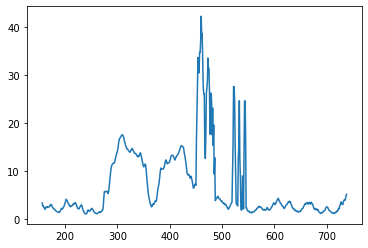

In [21]:
# test reading one sim - RMSF not used
tprSim = sims_nucl + "/run_t03_2/topol.tpr"
xtcSim = sims_nucl + "/run_t03_2/traj_comp.xtc"

cSim = mda.Universe(ref_structure, xtcSim, in_memory=True) # this works

# KRAS index 1 to 452
atoms_cSim_kras_bb         = cSim.select_atoms("name BB and index 0:451")
atoms_cSim_kras_bb_gdomain = cSim.select_atoms("name BB and index 0:393") # Residue 2 to 170

# Test alignment 
# 1) Center on KRAS CYF BB
# 2) translate up in z axes 
# 3) wrap all particles into the box 
atoms_cSim_kras_CYF_bb  = cSim.select_atoms("index 430") # Get CYF BB atom index 431
transforms = [MDAnalysis.transformations.center_in_box(atoms_cSim_kras_CYF_bb),
              MDAnalysis.transformations.translate([0,0,70]),
              MDAnalysis.transformations.wrap(cSim.atoms)]
cSim.trajectory.add_transformations(*transforms)

# Now when protein shoudl be all in - align on each solid part before RMSF 

# KRAS 
#aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 0:393", in_memory=True).run() # align on g-domain only
#rmsfer = RMSF(atoms_cSim_kras_bb, verbose=True).run()
#plt.plot(atoms_cSim_kras_bb.resnums, rmsfer.rmsf)

# BRAF 
aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 452:1818", in_memory=True).run()
rmsfer = RMSF(atoms_cSim_braf_bb, verbose=True).run()
plt.plot(atoms_cSim_braf_bb.resnums, rmsfer.rmsf)


In [38]:
atoms_cSim_braf_bb.resnums[-1]

array([156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272,
       273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
       286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
       299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
       312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,
       325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 33

In [24]:
# Read RMSD data for x4 replicates 

# Read sims_nucl 
#cSimPath = sims_nucl
#name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts_fix_nucleotides"

cSimPath = sims_part
name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts"
#cSimPath = sims_full
#name = "13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_full"

array_data_name = np.array(['KRAS', 'BRAF-all', 'BRAF-RBD', 'BRAF-CRD', 'BRAF-loop1', 'BRAF-loop2', 'BRAF-KD', '14_3_3-S729', '14_3_3-S365'])
array_data = np.empty([4,738,10], dtype= float) # the second axis is the number of residues BRAF all is the max with 583 residue but numbered up to 738
array_data[:] = np.nan
for s in range(4):
    #tprSim = cSimPath + f"/run_t03_{s+1}/topol.tpr"
    #xtcSim = cSimPath + f"/run_t03_{s+1}/traj_comp.xtc"
    tprSim = cSimPath + f"/run10fs{s+1}/topol.tpr"
    xtcSim = cSimPath + f"/run10fs{s+1}/traj_comp.xtc"
    print(f"Read i, tpr {tprSim}, xtc {xtcSim}")   
    
    # if data alreaddy computed use that 
    if os.path.isfile(f"{name}_rmsf_run_{s}.npz"):
        load_data = np.load(f"{name}_rmsf_run_{s}.npz", allow_pickle=True)
        array_data[s,:,:] = load_data['rmsf'][s,:,:]
    else:
        #Get error with tpr likely need newer MDAnalysis version of GROMACS 2023.01
        cSim = mda.Universe(ref_structure, xtcSim, n_memory=True) # this works

        # Align current traj 
        # 1) Center on KRAS CYF BB
        # 2) translate up in z axes 
        # 3) wrap all particles into the box 
        atoms_cSim_kras_CYF_bb  = cSim.select_atoms("index 430") # Get CYF BB atom index 431
        transforms = [MDAnalysis.transformations.center_in_box(atoms_cSim_kras_CYF_bb),
                      MDAnalysis.transformations.translate([0,0,70]),
                      MDAnalysis.transformations.wrap(cSim.atoms)]
        cSim.trajectory.add_transformations(*transforms)

        # KRAS index 1 to 452
        atoms_cSim_kras_bb         = cSim.select_atoms("name BB and index 0:451")
        atoms_cSim_kras_bb_gdomain = cSim.select_atoms("name BB and index 0:393") # Residue 2 to 170

        # BRAF index 453 to 1819
        atoms_cSim_braf_bb    = cSim.select_atoms("name BB and index 452:1818")
        atoms_cSim_braf_rbd   = cSim.select_atoms("name BB and index 452:618")   # Residue 156 to 228
        atoms_cSim_braf_crd   = cSim.select_atoms("name BB and index 637:740")   # Residue 237 to 275
        atoms_cSim_braf_loop1 = cSim.select_atoms("name BB and index 753:928")   # Residue 282 to 359
        atoms_cSim_braf_loop2 = cSim.select_atoms("name BB and index 955:1116")  # Residue 371 to 448 # note 8 residue loop 2 ext not included 
        atoms_cSim_braf_kd    = cSim.select_atoms("name BB and index 1136:1768") # Residue 457 to 723 

        # 14_3_3 index 1820 to 1897
        atoms_cSim_14_3_3_bb = cSim.select_atoms("name BB and index 1819:2896")
        atoms_cSim_14_3_3_bb_S729_CR3 = cSim.select_atoms("name BB and index 1819:2357") # Residue 1 to 230 
        atoms_cSim_14_3_3_bb_S365_CR2 = cSim.select_atoms("name BB and index 2358:2896") # Residue 1 to 230 

        #RMSF data in array_data_name
        # 0 is frame time 
        # 1 KRAS full - aligned on g-domain only 
        # 2 BRAF full - aligned on full 
        # 3 BRAF RBD  - aligned on RBD 
        # 4 BRAF CRD  - aligned on CRD 
        # 5 BRAF loop1 - aligned on full 
        # 6 BRAF loop2 - aligned on full
        # 7 BRAF KD - aligned on KD 
        # 8 14_3_3_S729_CR3 - aligned on 14_3_3_S729_CR3 
        # 9 14_3_3_S365_CR2 - aligned on 14_3_3_S365_CR2 

        print(f" - {s} RMSF 1 KRAS")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 0:393", in_memory=True).run() # align on g-domain only
        rmsfer = RMSF(atoms_cSim_kras_bb, verbose=True).run()
        array_data[s,atoms_cSim_kras_bb.resnums[0]-1:atoms_cSim_kras_bb.resnums[-1],0] = atoms_cSim_kras_bb.resnums
        array_data[s,atoms_cSim_kras_bb.resnums[0]-1:atoms_cSim_kras_bb.resnums[-1],1] = rmsfer.rmsf

        print(f" - {s} RMSF 2 BRAF full, loop1 and loop2")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 452:1818", in_memory=True).run() # align on BRAF full 
        rmsfer = RMSF(atoms_cSim_braf_bb, verbose=True).run()
        array_data[s,atoms_cSim_braf_bb.resnums[0]-1:atoms_cSim_braf_bb.resnums[-1],2] = rmsfer.rmsf
        rmsfer = RMSF(atoms_cSim_braf_loop1, verbose=True).run()
        array_data[s,atoms_cSim_braf_loop1.resnums[0]-1:atoms_cSim_braf_loop1.resnums[-1],5] = rmsfer.rmsf
        rmsfer = RMSF(atoms_cSim_braf_loop2, verbose=True).run()
        array_data[s,atoms_cSim_braf_loop2.resnums[0]-1:atoms_cSim_braf_loop2.resnums[-1],6] = rmsfer.rmsf
        
        print(f" - {s} RMSF 3 BRAF RBD")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 452:618", in_memory=True).run() # align on BRAF RBD 
        rmsfer = RMSF(atoms_cSim_braf_rbd, verbose=True).run()
        array_data[s,atoms_cSim_braf_rbd.resnums[0]-1:atoms_cSim_braf_rbd.resnums[-1],3] = rmsfer.rmsf

        print(f" - {s} RMSF 4 BRAF CRD")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 637:740", in_memory=True).run() # align on BRAF CRD 
        rmsfer = RMSF(atoms_cSim_braf_crd, verbose=True).run()
        array_data[s,atoms_cSim_braf_crd.resnums[0]-1:atoms_cSim_braf_crd.resnums[-1],4] = rmsfer.rmsf

        print(f" - {s} RMSF 7 BRAF KD")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 1136:1768", in_memory=True).run() # align on BRAF KD 
        rmsfer = RMSF(atoms_cSim_braf_kd, verbose=True).run()
        array_data[s,atoms_cSim_braf_kd.resnums[0]-1:atoms_cSim_braf_kd.resnums[-1],7] = rmsfer.rmsf

        print(f" - {s} RMSF 8 14_3_3_S729_CR3")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 1819:2357", in_memory=True).run() # align on 14_3_3_S729_CR3
        rmsfer = RMSF(atoms_cSim_14_3_3_bb_S729_CR3, verbose=True).run()
        array_data[s,atoms_cSim_14_3_3_bb_S729_CR3.resnums[0]-1:atoms_cSim_14_3_3_bb_S729_CR3.resnums[-1],8] = rmsfer.rmsf

        print(f" - {s} RMSF 9 14_3_3_S365_CR2")
        aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 2358:2896", in_memory=True).run() # align on 14_3_3_S365_CR2
        rmsfer = RMSF(atoms_cSim_14_3_3_bb_S365_CR2, verbose=True).run()
        array_data[s,atoms_cSim_14_3_3_bb_S365_CR2.resnums[0]-1:atoms_cSim_14_3_3_bb_S365_CR2.resnums[-1],9] = rmsfer.rmsf

        np.savez(f"{name}_rmsf_run_{s}", rmsf=array_data, rmsf_names=array_data_name) # save in cwd 

np.savez(f"{name}_rmsf_all", rmsf=array_data, rmsf_names=array_data_name) # save in cwd 


Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs1/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs1/traj_comp.xtc


/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: A
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: D
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/usr/WS1/mummiusr/mummi-dev-spack/spack/0.19/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.5_ddcmd-cawzsbez3ld7llmjsorgprwuv4dkvmtw/lib/python3.9/site-packages/MDAnalysis/topology/guessers.py:146: UserWarnin

 - 0 RMSF 1 KRAS


100%|██████████| 1001/1001 [00:00<00:00, 15112.90it/s]


 - 0 RMSF 2 BRAF full, loop1 and loop2


100%|██████████| 1001/1001 [00:00<00:00, 17048.15it/s]


 - 0 RMSF 3 BRAF RBD


100%|██████████| 1001/1001 [00:00<00:00, 17699.20it/s]


 - 0 RMSF 4 BRAF CRD


100%|██████████| 1001/1001 [00:00<00:00, 19005.73it/s]


 - 0 RMSF 7 BRAF KD


100%|██████████| 1001/1001 [00:00<00:00, 13642.47it/s]


 - 0 RMSF 8 14_3_3_S729_CR3


100%|██████████| 1001/1001 [00:00<00:00, 14313.91it/s]


 - 0 RMSF 9 14_3_3_S365_CR2


100%|██████████| 1001/1001 [00:00<00:00, 14217.02it/s]


Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs2/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs2/traj_comp.xtc
 - 1 RMSF 1 KRAS


100%|██████████| 1001/1001 [00:00<00:00, 15114.69it/s]


 - 1 RMSF 2 BRAF full, loop1 and loop2


100%|██████████| 1001/1001 [00:00<00:00, 17080.05it/s]


 - 1 RMSF 3 BRAF RBD


100%|██████████| 1001/1001 [00:00<00:00, 17389.69it/s]


 - 1 RMSF 4 BRAF CRD


100%|██████████| 1001/1001 [00:00<00:00, 19089.98it/s]


 - 1 RMSF 7 BRAF KD


100%|██████████| 1001/1001 [00:00<00:00, 13871.03it/s]


 - 1 RMSF 8 14_3_3_S729_CR3


100%|██████████| 1001/1001 [00:00<00:00, 14250.22it/s]


 - 1 RMSF 9 14_3_3_S365_CR2


100%|██████████| 1001/1001 [00:00<00:00, 14079.80it/s]


Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs3/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs3/traj_comp.xtc
 - 2 RMSF 1 KRAS


100%|██████████| 1001/1001 [00:00<00:00, 15429.47it/s]


 - 2 RMSF 2 BRAF full, loop1 and loop2


100%|██████████| 1001/1001 [00:00<00:00, 17015.26it/s]


 - 2 RMSF 3 BRAF RBD


100%|██████████| 1001/1001 [00:00<00:00, 17632.90it/s]


 - 2 RMSF 4 BRAF CRD


100%|██████████| 1001/1001 [00:00<00:00, 19171.40it/s]


 - 2 RMSF 7 BRAF KD


100%|██████████| 1001/1001 [00:00<00:00, 13707.50it/s]


 - 2 RMSF 8 14_3_3_S729_CR3


100%|██████████| 1001/1001 [00:00<00:00, 14339.77it/s]


 - 2 RMSF 9 14_3_3_S365_CR2


100%|██████████| 1001/1001 [00:00<00:00, 14346.92it/s]


Read i, tpr /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs4/topol.tpr, xtc /p/vast1/helgi/ADMIRRAL/KRAS/Martini3_KRAS/test_init_models/13_v1_on_membrane_pfpatch_000000186224_ord_14_kd_e_parts/run10fs4/traj_comp.xtc
 - 3 RMSF 1 KRAS


100%|██████████| 1001/1001 [00:00<00:00, 14839.09it/s]


 - 3 RMSF 2 BRAF full, loop1 and loop2


100%|██████████| 1001/1001 [00:00<00:00, 17343.93it/s]


 - 3 RMSF 3 BRAF RBD


100%|██████████| 1001/1001 [00:00<00:00, 17671.04it/s]


 - 3 RMSF 4 BRAF CRD


100%|██████████| 1001/1001 [00:00<00:00, 19122.07it/s]


 - 3 RMSF 7 BRAF KD


100%|██████████| 1001/1001 [00:00<00:00, 13823.90it/s]


 - 3 RMSF 8 14_3_3_S729_CR3


100%|██████████| 1001/1001 [00:00<00:00, 14303.28it/s]


 - 3 RMSF 9 14_3_3_S365_CR2


100%|██████████| 1001/1001 [00:00<00:00, 14341.88it/s]


<Figure size 1080x1440 with 0 Axes>

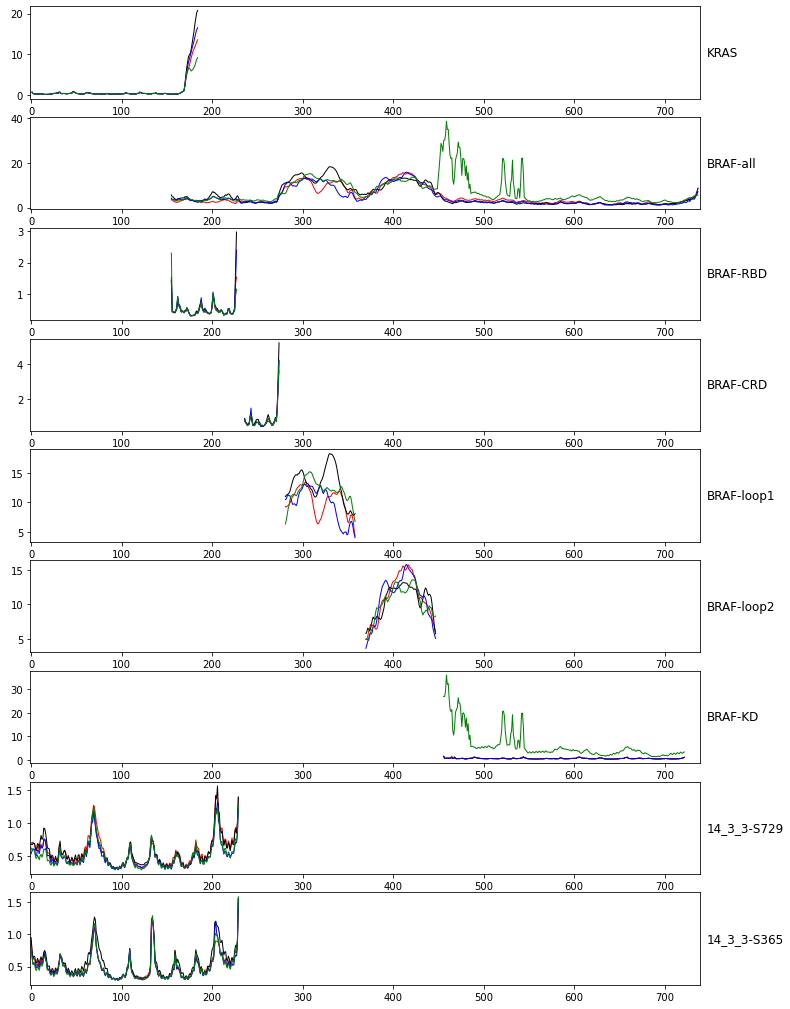

In [20]:
# plot combined RMSF
plt.figure(figsize=(15, 20))
fig, axs = plt.subplots(9, figsize=(12, 18))
colors = ['red', 'black', 'blue', 'green']
x = np.arange(0,738) 
for i in range(9):
    for s in range(4):
        axs[i].plot(x, array_data[s,:,i+1], lw=1, color=colors[s]);
    axs[i].text(1.01, 0.5, array_data_name[i], va="center", ha="left", size=12, transform=axs[i].transAxes)
    axs[i].set_xlim([-1, 739])
fig.savefig(f"{name}_rmsf_01.eps", bbox_inches='tight')
fig.savefig(f"{name}_rmsf_01.pdf", bbox_inches='tight')

In [23]:
# calculate avg and sd - not really meaningfull for RMSF but here anyway 
for i in range(9):
    print(f"RMSF - {array_data_name[i]:<11s} avg {np.nanmean(array_data[:,:,i+1]):5.2f} sd_avg {np.std(np.nanmean(array_data[:,:,i+1], axis=1)):.2f} sd_all {np.nanstd(array_data[:,:,i+1]):.2f} - avg over residue and all x4 repeats")
    

RMSF - KRAS        avg  1.14 sd_avg 0.17 sd_all 2.79 - avg over residue and all x4 repeats
RMSF - BRAF-all    avg  5.50 sd_avg 1.03 sd_all 4.69 - avg over residue and all x4 repeats
RMSF - BRAF-RBD    avg  0.51 sd_avg 0.02 sd_all 0.30 - avg over residue and all x4 repeats
RMSF - BRAF-CRD    avg  0.81 sd_avg 0.05 sd_all 0.71 - avg over residue and all x4 repeats
RMSF - BRAF-loop1  avg 11.21 sd_avg 1.32 sd_all 2.84 - avg over residue and all x4 repeats
RMSF - BRAF-loop2  avg 10.67 sd_avg 0.28 sd_all 2.85 - avg over residue and all x4 repeats
RMSF - BRAF-KD     avg  1.92 sd_avg 2.46 sd_all 4.04 - avg over residue and all x4 repeats
RMSF - 14_3_3-S729 avg  0.54 sd_avg 0.03 sd_all 0.21 - avg over residue and all x4 repeats
RMSF - 14_3_3-S365 avg  0.51 sd_avg 0.03 sd_all 0.21 - avg over residue and all x4 repeats


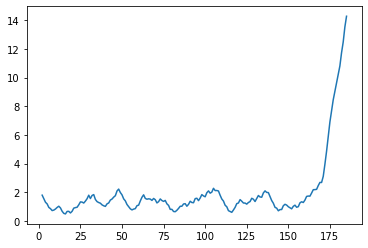

In [11]:

####### Nothing below here is used 
import matplotlib.pyplot as plt

plt.plot(atoms_cSim_kras_bb.resnums, rmsfer.rmsf)

100%|██████████| 1968/1968 [00:00<00:00, 10552.18it/s]


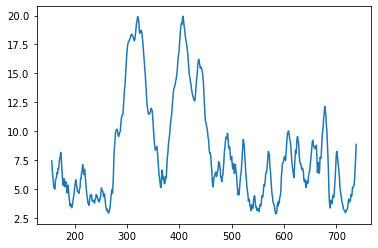

In [12]:
# do for BRAF 
aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 452:1818", in_memory=True).run()
rmsfer = RMSF(atoms_cSim_braf_bb, verbose=True).run()
plt.plot(atoms_cSim_braf_bb.resnums, rmsfer.rmsf)

100%|██████████| 1968/1968 [00:00<00:00, 11673.38it/s]


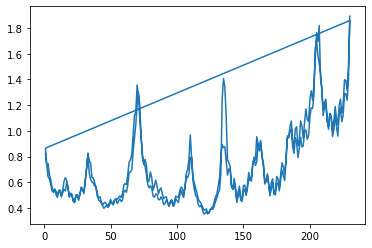

In [13]:
# do for 14_3_3 
aligner = align.AlignTraj(cSim, uni_ref, select="name BB and index 1819:2896", in_memory=True).run()
rmsfer = RMSF(atoms_cSim_14_3_3_bb, verbose=True).run()
plt.plot(atoms_cSim_14_3_3_bb.resnums, rmsfer.rmsf)

In [ ]:
# @question1 - should referance be ref or average ???
# @question2 - we need to center and PBC fix - how to do best?
# @TODO fix plots - add units - 14_3_3 in two parts, larger figures, save data, do average for all 
# @TODO do RMSD with time for diffrent domains (also align for that)

In [5]:
# Check all sims in dir 
for file in os.listdir(cdata):
    if file.startswith("1ras.pfpatch_") and file.endswith(".tpr"):
        name = file[0:-4]      
        if os.path.exists(os.path.join(cdir, f"{name}_results.npy")):
            print(f"Name {name} done as file {os.path.join(cdir, f'{name}_results.npy')} found")
        else:
            ctpr = file
            cxtc = name + "-small.xtc"
            cndx = name + "-index.ndx"
            cgro = name + "-small.0ns.gro"
            print(f"progress name {name} using files {cxtc} {cgro} {cndx} {ctpr}")
            cSim = mda.Universe(os.path.join(cdata, cgro), os.path.join(cdata, cxtc))
            results = checkOverlapp(cSim, name)
            #print(results)
            np.save(os.path.join(cdir, f"{name}_results.npy"), results)
    

Name 1ras.pfpatch_000000001362 done as file /p/vast1/helgi/ADMIRRAL/KRAS/RAS-RAF-docking/AA-all-results-BRAF-6nyb_c1_A0_A0/1ras.pfpatch_000000001362_results.npy found
Name 1ras.pfpatch_000000001935 done as file /p/vast1/helgi/ADMIRRAL/KRAS/RAS-RAF-docking/AA-all-results-BRAF-6nyb_c1_A0_A0/1ras.pfpatch_000000001935_results.npy found
Name 1ras.pfpatch_000000005846 done as file /p/vast1/helgi/ADMIRRAL/KRAS/RAS-RAF-docking/AA-all-results-BRAF-6nyb_c1_A0_A0/1ras.pfpatch_000000005846_results.npy found
progress name 1ras.pfpatch_000000012729 using files 1ras.pfpatch_000000012729-small.xtc 1ras.pfpatch_000000012729-small.0ns.gro 1ras.pfpatch_000000012729-index.ndx 1ras.pfpatch_000000012729.tpr


/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.1_ddcmd-nsdxixotabvltjfcfjba2rfpa7flsjlh/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:718: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "
/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.1_ddcmd-nsdxixotabvltjfcfjba2rfpa7flsjlh/lib/python3.7/site-packages/MDAnalysis/core/topologyattrs.py:2019: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(sorted(unique_bonds)), 4)
/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.1_ddcmd-nsdxixotabvltjfcfjba2rfpa7flsjlh/lib/python3.7/site-packages/MDAnaly

Frame 0 overlapps 37 108 24 0 delta [-22.82539636  23.00406402 -29.19211981] angle 134.77663165145387


/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.1_ddcmd-nsdxixotabvltjfcfjba2rfpa7flsjlh/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1021: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  "".format(attrname, default))
/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.1_ddcmd-nsdxixotabvltjfcfjba2rfpa7flsjlh/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1021: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  "".format(attrname, default))
/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-mdanalysis-mummi-mda_1.0.1_ddcmd-nsdxixotabvltjfcfjba2rfpa7flsjlh/lib/python3.7/site-packages/MDAnalysis/coordinates/PDB.py:1021: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  "".format(attrname, default))
/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/p

Frame 20 overlapps 45 171 24 177 delta [-19.24825439  23.94624967 -29.84677984] angle 128.79269723778697
Frame 40 overlapps 45 203 30 208 delta [ -4.35594334  17.00418396 -39.85175411] angle 104.36841900323837
Frame 60 overlapps 49 185 22 192 delta [ -7.30764567  16.44436387 -40.40806062] angle 113.95969435955821
Frame 80 overlapps 44 177 17 219 delta [-22.96066118  16.99806898 -35.85926865] angle 143.48698387293348
Frame 100 overlapps 37 165 23 23 delta [-17.95605829  16.49582131 -42.94727025] angle 137.42701908267895
Frame 120 overlapps 36 170 23 124 delta [-12.27521159  13.79787783 -44.64769537] angle 131.65772748951372
Frame 140 overlapps 53 143 21 0 delta [ -1.24013496  12.60253768 -46.42854096] angle 95.62001701136523
Frame 160 overlapps 36 145 25 0 delta [  3.94211509  13.26763726 -47.87606645] angle 73.45212480128673
Frame 180 overlapps 31 205 21 124 delta [  0.13951878  16.17551945 -48.38915498] angle 89.5058186979978
Frame 200 overlapps 42 207 18 132 delta [  3.56660221  27.3

Frame 1600 overlapps 55 103 15 193 delta [ 33.26739077   7.33927233 -32.12666968] angle 12.441002873033584
Frame 1620 overlapps 50 0 19 100 delta [ 32.35320971  13.04805686 -30.23037156] angle 21.964231645689388
Frame 1640 overlapps 61 163 17 91 delta [ 30.15558379   6.5379389  -35.52454409] angle 12.232797425165662
Frame 1660 overlapps 41 11 21 3 delta [ 26.66054123   0.0795695  -36.68350275] angle 0.17100113898822367
Frame 1680 overlapps 47 122 12 50 delta [ 28.45468223  -4.07132661 -36.4861809 ] angle 351.85732411060917
Frame 1700 overlapps 58 0 15 0 delta [ 12.8952068   -5.82424053 -31.98981536] angle 335.69324109514855
Frame 1720 overlapps 57 0 15 0 delta [  7.64630922  -3.15739205 -32.54588438] angle 337.5627909626951
Frame 1740 overlapps 49 0 14 0 delta [ 17.75606394  -9.29739976 -30.53448708] angle 332.3626233370158
Frame 1760 overlapps 51 0 14 0 delta [  8.87988633  -3.49387646 -35.3423756 ] angle 338.5223670317667
Frame 1780 overlapps 42 152 23 0 delta [  4.53915109  -1.04630

Frame 1140 overlapps 44 11 17 228 delta [ 49.25521925  -7.57012343 -25.93696853] angle 351.26247713880844
Frame 1160 overlapps 37 0 20 90 delta [ 45.65878647  -7.95612969 -32.73031616] angle 350.1153498103464
Frame 1180 overlapps 62 258 19 363 delta [ 42.29308962 -16.24527505 -30.65260666] angle 338.98762796860035
Frame 1200 overlapps 47 28 18 243 delta [ 47.91364358 -18.16939757 -25.08775653] angle 339.2327039317486
Frame 1220 overlapps 62 7 17 97 delta [ 46.24522085  -8.3656317  -28.0130925 ] angle 349.74624069591
Frame 1240 overlapps 56 45 20 251 delta [ 45.87243403  -9.58393855 -26.83042371] angle 348.1991768576466
Frame 1260 overlapps 50 0 13 63 delta [ 48.32090621 -12.42115224 -28.70180997] angle 345.58392447713277
Frame 1280 overlapps 63 51 22 63 delta [ 41.54266579  -8.85587819 -31.78018882] angle 347.9660751415174
Frame 1300 overlapps 51 0 20 20 delta [ 42.75298425 -11.74854593 -34.34127586] angle 344.63437056093755
Frame 1320 overlapps 67 0 19 0 delta [ 49.00988363  -0.587152

Frame 660 overlapps 45 200 14 73 delta [ -3.67320723 -18.41182339 -38.54091926] angle 258.7174711751236
Frame 680 overlapps 40 92 20 16 delta [ -1.9139937   -9.25430321 -43.02600911] angle 258.3147258660597
Frame 700 overlapps 57 189 16 174 delta [-12.12762918 -10.99012363 -33.16916097] angle 222.18304172004318
Frame 720 overlapps 45 118 14 70 delta [-10.53776111 -14.70424726 -39.52315924] angle 234.37282063496343
Frame 740 overlapps 38 238 20 346 delta [ -9.64557282  -0.1967263  -33.42757957] angle 181.16841417092422
Frame 760 overlapps 53 18 19 297 delta [-14.01200742   2.79181824 -29.34163596] angle 168.73168453375084
Frame 780 overlapps 49 0 15 133 delta [-14.92290395   0.68533709 -27.46818524] angle 177.37052844741223
Frame 800 overlapps 47 142 30 287 delta [-13.8850979    2.44709126 -28.16418226] angle 170.00490704216307
Frame 820 overlapps 54 2 14 135 delta [ -9.48454151   1.70297255 -27.31132933] angle 169.82086685586688
Frame 840 overlapps 49 62 14 126 delta [-13.20636389  -0.

Frame 240 overlapps 113 160 29 362 delta [-16.22127792  14.66842513 -23.99544252] angle 137.87788703265264
Frame 260 overlapps 104 179 15 328 delta [-16.42848594   7.87230308 -27.28346761] angle 154.39690416219239
Frame 280 overlapps 106 184 29 284 delta [ -9.13902199   8.30102974 -29.94618364] angle 137.75093907430713
Frame 300 overlapps 105 142 24 323 delta [-10.18981619   4.26691048 -30.04133476] angle 157.27886086870606
Frame 320 overlapps 113 163 16 347 delta [ -6.72678704   3.61024262 -32.60987919] angle 151.77770322802274
Frame 340 overlapps 128 155 25 358 delta [ -7.16939406   2.67945376 -31.62813471] angle 159.50752264357249
Frame 360 overlapps 105 147 25 354 delta [-11.04920067   6.71218257 -30.5159446 ] angle 148.72210273783486
Frame 380 overlapps 91 168 24 367 delta [ -6.75436568   6.22594156 -32.486128  ] angle 137.3312054431015
Frame 400 overlapps 93 174 33 330 delta [ -5.52442192   6.31521403 -29.47746129] angle 131.1787800611608
Frame 420 overlapps 91 193 30 384 delta [

Frame 1800 overlapps 41 206 17 146 delta [  2.11636427  11.64873935 -23.67762904] angle 79.70271617853344
Frame 1820 overlapps 50 214 22 328 delta [ -2.16594007  11.83958509 -23.7909139 ] angle 100.36708264429043
Frame 1840 overlapps 47 209 29 401 delta [ -4.22218683  11.26411984 -24.7793457 ] angle 110.54775862414023
Frame 1860 overlapps 48 226 31 257 delta [ -2.65466549  12.6264223  -24.31503185] angle 101.8733244168315
Frame 1880 overlapps 58 226 20 140 delta [  2.98551631  13.26053846 -25.07522509] angle 77.31182276983888
Frame 1900 overlapps 42 183 24 373 delta [ -3.8916361    7.64472749 -25.50079013] angle 116.97889049234736
Frame 1920 overlapps 44 214 26 309 delta [ -1.92497045   8.07206532 -25.06588394] angle 103.41298451662765
progress name 1ras.pfpatch_000000054478 using files 1ras.pfpatch_000000054478-small.xtc 1ras.pfpatch_000000054478-small.0ns.gro 1ras.pfpatch_000000054478-index.ndx 1ras.pfpatch_000000054478.tpr
Frame 0 overlapps 46 180 22 6 delta [-15.13364517  -2.847333

Frame 1380 overlapps 46 84 20 2 delta [  2.67461289  20.06533453 -36.4031385 ] angle 82.4075030483268
Frame 1400 overlapps 49 137 23 197 delta [ 11.74266496  20.73387932 -29.22546951] angle 60.4748854380828
Frame 1420 overlapps 47 135 20 40 delta [  1.7695761   19.92854633 -32.30896995] angle 84.92567002998217
Frame 1440 overlapps 46 170 20 137 delta [  3.72879315  17.57860773 -32.99168997] angle 78.02387513397933
Frame 1460 overlapps 49 141 24 188 delta [  9.47732017  21.68697029 -29.55994762] angle 66.39441890084761
Frame 1480 overlapps 48 131 22 165 delta [  4.41836409  24.18393999 -30.28587212] angle 79.64634915911108
Frame 1500 overlapps 50 179 20 222 delta [  2.29563571  26.52424307 -27.68301891] angle 85.0534577271706
Frame 1520 overlapps 47 161 31 231 delta [  2.32291371  21.87727458 -31.11491838] angle 83.93908315863082
Frame 1540 overlapps 41 177 23 231 delta [  6.67782232  24.9467287  -29.98509494] angle 75.01421567203039
Frame 1560 overlapps 45 272 25 239 delta [ 19.9677604

Frame 880 overlapps 103 204 13 278 delta [-17.36248728  23.46048085 -22.92849223] angle 126.5041733910646
Frame 900 overlapps 78 175 22 295 delta [-17.27466639  20.80151469 -24.52697476] angle 129.7080150695907
Frame 920 overlapps 100 201 19 310 delta [-14.17200017  21.16399407 -24.12920745] angle 123.80736686817481
Frame 940 overlapps 93 193 16 354 delta [-16.84315287  19.42436246 -26.26108657] angle 130.92904392732598
Frame 960 overlapps 125 221 13 345 delta [-14.70273077  15.8876954  -29.16696185] angle 132.78167377067481
Frame 980 overlapps 81 242 14 271 delta [-20.91672756  15.86394283 -25.34691782] angle 142.82210867283897
Frame 1000 overlapps 101 281 14 219 delta [-15.62745519  20.43539475 -23.89787403] angle 127.40604415003992
Frame 1020 overlapps 67 226 20 311 delta [-21.52606192  17.16708319 -25.31048861] angle 141.4275600463022
Frame 1040 overlapps 63 313 36 275 delta [-14.42642734  17.9611576  -22.74672398] angle 128.771480083054
Frame 1060 overlapps 81 296 21 265 delta [-1

Frame 360 overlapps 76 98 12 303 delta [  5.86054637  18.52212081 -26.95994522] angle 72.44221435548316
Frame 380 overlapps 87 104 23 260 delta [ 12.70830448  17.93309724 -26.00006686] angle 54.676674409019924
Frame 400 overlapps 74 80 19 333 delta [ 11.06406019  17.27653624 -23.76128115] angle 57.36410984036239
Frame 420 overlapps 64 133 22 270 delta [ 13.05890938  15.31534063 -27.08552237] angle 49.54681566082152
Frame 440 overlapps 55 278 34 316 delta [  0.68872852  26.23496556 -28.04823886] angle 88.49619868621367
Frame 460 overlapps 51 273 17 303 delta [  6.48030303  23.84284076 -29.13387756] angle 74.79474882342807
Frame 480 overlapps 54 235 29 291 delta [ -1.11612137  27.31539529 -22.68139778] angle 92.3398339888147
Frame 500 overlapps 42 237 20 338 delta [ -4.42551427  29.09757145 -21.05055033] angle 98.64796706184273
Frame 520 overlapps 43 236 16 314 delta [  1.80787853  27.53091172 -24.56351568] angle 86.24293943244703
Frame 540 overlapps 51 230 18 325 delta [  2.39806024  25

Frame 1920 overlapps 63 240 39 152 delta [ 10.12006004  15.15879128 -26.20218608] angle 56.27279325561943
progress name 1ras.pfpatch_000000119395 using files 1ras.pfpatch_000000119395-small.xtc 1ras.pfpatch_000000119395-small.0ns.gro 1ras.pfpatch_000000119395-index.ndx 1ras.pfpatch_000000119395.tpr
Frame 0 overlapps 77 192 21 180 delta [-14.75424717  20.52205968 -19.3862424 ] angle 125.71408519576208
Frame 20 overlapps 52 179 36 206 delta [ -8.50496715  21.39726997 -26.76374669] angle 111.67678569512519
Frame 40 overlapps 62 231 15 218 delta [ -0.95115181  25.17139301 -22.75430455] angle 92.16400691166037
Frame 60 overlapps 64 203 21 199 delta [  0.03211818  23.43224358 -25.40000814] angle 89.92146569594804
Frame 80 overlapps 52 233 15 241 delta [ -1.75030101  24.36151419 -26.29473507] angle 94.10946693630135
Frame 100 overlapps 60 187 18 236 delta [ -1.47315443  22.02194575 -25.16739003] angle 93.82708987226096
Frame 120 overlapps 61 217 13 312 delta [ -0.03684697  20.76945172 -27.856

Frame 1500 overlapps 46 140 19 279 delta [ -5.35393603  29.97552333 -30.88134063] angle 100.12682778638607
Frame 1520 overlapps 61 166 22 236 delta [-12.85927138  27.02399754 -29.57156039] angle 115.44727183748077
Frame 1540 overlapps 58 215 19 302 delta [ -9.40970191  24.73654915 -27.86007062] angle 110.82665015704701
Frame 1560 overlapps 47 139 15 285 delta [-15.18369376  24.97006522 -26.29642103] angle 121.30277440948791
Frame 1580 overlapps 48 258 21 241 delta [-17.47764     21.23625165 -27.76648976] angle 129.4547099802893
Frame 1600 overlapps 40 224 19 247 delta [-17.39478894  24.15606902 -26.12635655] angle 125.75766618628877
Frame 1620 overlapps 51 154 17 313 delta [-12.92503667  21.84611909 -29.3144756 ] angle 120.6102542931179
Frame 1640 overlapps 49 144 22 296 delta [ -9.73775931  25.87383025 -31.31037015] angle 110.6241061316408
Frame 1660 overlapps 46 86 22 345 delta [-10.98873328  25.664124   -27.14933444] angle 113.17939292916442
Frame 1680 overlapps 44 82 27 299 delta [

Frame 980 overlapps 34 364 32 160 delta [  9.369511     2.03509096 -30.43047652] angle 12.254500721304028
Frame 1000 overlapps 48 334 29 169 delta [  9.16477828   0.47848465 -30.54407765] angle 2.988646452764745
Frame 1020 overlapps 32 317 28 133 delta [  5.88097747   4.9740006  -29.71327644] angle 40.223802276152334
Frame 1040 overlapps 35 317 23 102 delta [  9.32993848  -0.89830174 -28.34436978] angle 354.50042077440446
Frame 1060 overlapps 42 325 21 132 delta [  7.95582923   1.09072779 -28.0985518 ] angle 7.8064663269235615
Frame 1080 overlapps 44 331 21 120 delta [  7.91223773  -1.5802431  -27.59157012] angle 348.70541764961774
Frame 1100 overlapps 41 313 27 105 delta [  9.03655349  -2.75315219 -27.73375771] angle 343.0556786276996
Frame 1120 overlapps 36 202 30 63 delta [  8.69065653  -9.9129204  -25.19866703] angle 311.2410423568905
Frame 1140 overlapps 30 286 16 86 delta [  9.42726644  -5.04103098 -26.6214619 ] angle 331.8653004378544
Frame 1160 overlapps 29 283 33 111 delta [  

Frame 600 overlapps 32 0 29 0 delta [ 36.30654621  14.85902858 -30.40878305] angle 22.257608291415433
Frame 620 overlapps 37 0 23 0 delta [ 33.9733957   10.98412189 -31.73787796] angle 17.91681875785609
Frame 640 overlapps 31 0 37 0 delta [ 41.91187957  14.63321996 -23.84278611] angle 19.246267021221964
Frame 660 overlapps 39 0 27 0 delta [ 36.55412357  12.89145896 -29.19855143] angle 19.42610061865326
Frame 680 overlapps 38 0 25 0 delta [ 39.94545676   3.89279979 -26.40503124] angle 5.5660626960317225
Frame 700 overlapps 43 34 21 42 delta [ 34.83545643   5.16120134 -30.55085921] angle 8.427601491514237
Frame 720 overlapps 49 118 23 138 delta [ 39.43018299   3.00479181 -26.99065543] angle 4.357823620547141
Frame 740 overlapps 58 243 17 301 delta [ 40.13406344   5.37818021 -25.53903772] angle 7.632472586576764
Frame 760 overlapps 53 217 19 265 delta [ 36.75073002   3.27792645 -27.97969943] angle 5.096923836123888
Frame 780 overlapps 58 192 24 247 delta [ 39.29333376  11.07569247 -23.117

Frame 180 overlapps 60 258 20 343 delta [-12.9168519   -2.24072871 -27.25891317] angle 189.8413484577603
Frame 200 overlapps 103 189 11 382 delta [ -8.73418043  -0.42921651 -34.05600235] angle 182.81337522991709
Frame 220 overlapps 87 220 18 388 delta [ -9.97514801   1.18957612 -30.33872718] angle 173.19936721670678
Frame 240 overlapps 91 182 23 398 delta [ -8.24030507   2.40072979 -32.99514521] angle 163.75705049210453
Frame 260 overlapps 109 214 10 191 delta [-14.78702744  23.5377582  -34.28431017] angle 122.13809904209164
Frame 280 overlapps 113 141 11 437 delta [-11.97812112  16.58872884 -37.74030309] angle 125.83168835059185
Frame 300 overlapps 152 222 16 109 delta [ -5.66854354  23.73139482 -37.15581193] angle 103.4341004290273
Frame 320 overlapps 127 321 15 114 delta [-11.06279075  29.4725438  -31.86641143] angle 110.57408688275524
Frame 340 overlapps 79 135 17 349 delta [-14.18951763  10.17661045 -40.39673231] angle 144.3522067173747
Frame 360 overlapps 90 195 20 102 delta [ -7

Frame 1740 overlapps 93 260 61 205 delta [ 15.82921383 -18.41770228 -26.46036645] angle 310.67762522526414
Frame 1760 overlapps 58 175 48 215 delta [ 15.1819987  -10.05557667 -32.04350928] angle 326.4820775414786
Frame 1780 overlapps 66 198 32 230 delta [ 15.00418109 -12.48963956 -31.58940152] angle 320.2256438942838
Frame 1800 overlapps 63 266 31 196 delta [ 16.11242463 -10.74528175 -33.08158717] angle 326.3009099415621
Frame 1820 overlapps 47 260 30 262 delta [ 23.57921429  -8.97011885 -29.29514928] angle 339.1719417980736
Frame 1840 overlapps 57 230 19 265 delta [ 24.00412459 -10.56449775 -28.34932168] angle 336.2451405190738
Frame 1860 overlapps 63 203 46 163 delta [ 15.50163565  -5.00799898 -32.43466196] angle 342.0962947036566
Frame 1880 overlapps 80 119 36 300 delta [ 19.00957799 -10.43914573 -30.31309777] angle 331.22652708329593
Frame 1900 overlapps 63 255 86 93 delta [ 24.10460695  -4.87047595 -27.2863002 ] angle 348.5768533876503
Frame 1920 overlapps 54 273 83 149 delta [ 24

Frame 1260 overlapps 53 266 24 153 delta [  7.72425139  -7.3602988  -35.10660659] angle 316.38213616543544
Frame 1280 overlapps 37 271 28 134 delta [  8.36582632  -8.20721015 -36.06971528] angle 315.5483461031147
Frame 1300 overlapps 44 348 32 84 delta [ 10.20351498 -20.41642216 -29.62430374] angle 296.55450705777673
Frame 1320 overlapps 32 366 31 117 delta [ 11.57109014 -18.7085439  -31.89085212] angle 301.73647146922417
Frame 1340 overlapps 42 386 22 187 delta [ 11.11558588 -22.13024458 -29.55994975] angle 296.6694770508113
Frame 1360 overlapps 35 373 40 152 delta [  7.546366   -19.12127431 -30.83241901] angle 291.537072991549
Frame 1380 overlapps 44 205 29 3 delta [  4.82181008 -24.5213371  -32.16110211] angle 281.12455631182524
Frame 1400 overlapps 53 271 29 85 delta [  6.6413245  -18.43969611 -32.67642323] angle 289.80722128522143
Frame 1420 overlapps 36 239 27 55 delta [ -0.67739591 -22.73060266 -32.13490203] angle 268.29303060760236
Frame 1440 overlapps 48 372 28 158 delta [ 12.

Frame 840 overlapps 50 190 16 340 delta [-30.38727449 -10.36060125 -35.69091741] angle 198.82691123685876
Frame 860 overlapps 86 192 19 390 delta [-32.3595151   -9.95444095 -33.61969706] angle 197.0989554650793
Frame 880 overlapps 63 230 24 339 delta [-37.99206497  -4.34654809 -28.93121671] angle 186.52664621074936
Frame 900 overlapps 63 218 17 195 delta [-33.6046783   -4.0462443  -33.30109678] angle 186.86577040818656
Frame 920 overlapps 46 179 23 364 delta [-34.04085115 -11.30740042 -28.40956874] angle 198.3750163676749
Frame 940 overlapps 53 142 30 321 delta [-31.75176147  -9.40533558 -34.35065335] angle 196.5000586391503
Frame 960 overlapps 104 187 19 291 delta [-28.51515794 -15.01369231 -38.62164658] angle 207.76753126057605
Frame 980 overlapps 143 155 20 380 delta [-34.11660572 -17.2979371  -34.34860932] angle 206.88610116270917
Frame 1000 overlapps 93 225 21 357 delta [-40.12332523 -16.62465534 -29.08467675] angle 202.50613045693416
Frame 1020 overlapps 74 138 23 409 delta [-36.

Frame 420 overlapps 47 338 35 203 delta [ -7.69017954  15.09430413 -25.98132842] angle 116.99773211901751
Frame 440 overlapps 60 315 31 203 delta [-10.12144258  14.09290947 -28.82836572] angle 125.68567950131522
Frame 460 overlapps 50 336 29 176 delta [-11.62429995  16.20157739 -27.10733541] angle 125.65866490259613
Frame 480 overlapps 58 329 36 180 delta [-19.57648093  12.77042523 -25.64333894] angle 146.88217994531254
Frame 500 overlapps 62 284 20 244 delta [-17.91066636  11.22478841 -26.65164055] angle 147.92422861160048
Frame 520 overlapps 46 257 23 283 delta [-14.26405519  15.26375816 -26.60873052] angle 133.06091668216027
Frame 540 overlapps 65 246 20 260 delta [-13.89315139  12.91830454 -29.34351511] angle 137.0823194737673
Frame 560 overlapps 62 209 22 324 delta [-16.962913    17.03121282 -31.00926902] angle 134.88488346039463
Frame 580 overlapps 81 216 37 165 delta [-11.89034664  12.22018423 -31.93211041] angle 134.21622948961664
Frame 600 overlapps 69 272 54 300 delta [-19.66

Frame 0 overlapps 38 332 20 161 delta [ 13.55133528 -18.14855254 -24.99692216] angle 306.74831427147114
Frame 20 overlapps 53 287 21 299 delta [ 13.69551503 -17.4384195  -23.45157868] angle 308.14483185286844
Frame 40 overlapps 34 158 18 371 delta [ 10.42818317 -21.3327941  -21.18436427] angle 296.0509312233369
Frame 60 overlapps 33 166 18 423 delta [ 10.21800056 -20.70854335 -24.50698196] angle 296.2626332852854
Frame 80 overlapps 48 145 15 332 delta [  7.8941206  -23.08534    -24.42593301] angle 288.8783199797808
Frame 100 overlapps 47 207 16 364 delta [  7.89266778 -20.85095391 -23.82926969] angle 290.733052498986
Frame 120 overlapps 61 166 20 348 delta [  3.3450888  -22.27152442 -25.12902166] angle 278.54173536055754
Frame 140 overlapps 52 206 14 343 delta [  4.25515266 -20.69641807 -24.37249719] angle 281.6180312920803
Frame 160 overlapps 56 200 16 338 delta [  5.01206217 -21.95630123 -23.70908767] angle 282.85882869037073
Frame 180 overlapps 51 128 17 355 delta [  1.34181759 -19.

Frame 1560 overlapps 69 201 16 376 delta [  8.72951133  -1.50841601 -23.19540368] angle 350.1963826823324
Frame 1580 overlapps 58 213 14 295 delta [ 10.00551799  -4.75782138 -21.97109107] angle 334.56798957645304
Frame 1600 overlapps 54 245 20 308 delta [ 10.73012177  -5.96442927 -23.84987821] angle 330.9321344283593
Frame 1620 overlapps 66 209 14 359 delta [  6.38648659  -6.85181256 -24.11907598] angle 312.98688320282326
Frame 1640 overlapps 80 185 14 308 delta [  6.9787299   -5.86444138 -23.14812345] angle 319.9586314820899
Frame 1660 overlapps 69 182 16 351 delta [  9.14169853  -6.36970797 -23.30217997] angle 325.13217630646943
Frame 1680 overlapps 76 159 16 335 delta [  4.74120451  -3.97928726 -24.5319876 ] angle 319.993304085216
Frame 1700 overlapps 59 190 14 320 delta [  6.80278917  -4.57987116 -24.62083962] angle 326.0502068585879
Frame 1720 overlapps 66 158 13 379 delta [  4.44424059  -7.28866429 -24.09405138] angle 301.3726217658717
Frame 1740 overlapps 43 224 18 355 delta [ 1

Frame 1140 overlapps 60 187 20 115 delta [-20.70182042 -11.66666838 -32.30437178] angle 209.40376444230031
Frame 1160 overlapps 74 194 22 0 delta [-27.17933123  -1.1392684  -29.73127266] angle 182.4002460185923
Frame 1180 overlapps 67 187 16 6 delta [-25.79181754  -8.69793752 -27.90485479] angle 198.6359745858816
Frame 1200 overlapps 62 250 18 47 delta [-24.75890803 -12.64097036 -28.1047772 ] angle 207.0471528972204
Frame 1220 overlapps 58 190 18 1 delta [-25.37848423  -9.90332975 -28.43405484] angle 201.3169934130712
Frame 1240 overlapps 66 207 12 0 delta [-24.48509323 -10.46520585 -28.36272269] angle 203.1424114774953
Frame 1260 overlapps 77 185 15 60 delta [-23.42860893 -15.40782221 -26.8740755 ] angle 213.3309155251485
Frame 1280 overlapps 52 204 11 50 delta [-23.16582119 -16.63563376 -27.36472954] angle 215.68254773567503
Frame 1300 overlapps 58 171 10 0 delta [-23.53921208 -18.51188354 -26.0705473 ] angle 218.18248375990427
Frame 1320 overlapps 57 164 14 0 delta [-26.73794052 -13

Frame 640 overlapps 44 0 17 0 delta [  0.3610924    2.58419291 -31.52296605] angle 82.04549470421912
Frame 660 overlapps 44 0 20 0 delta [ -6.12448684   0.79831256 -30.39394087] angle 172.57350002076447
Frame 680 overlapps 44 0 13 2 delta [  7.14018305   5.91986926 -30.75583182] angle 39.66185848508736
Frame 700 overlapps 45 0 13 0 delta [  1.86800038  -1.03968099 -32.61618282] angle 330.9008121870922
Frame 720 overlapps 44 0 16 0 delta [  5.39290984   4.10697132 -31.09195251] angle 37.29109096601287
Frame 740 overlapps 52 0 15 0 delta [  3.54327402   0.92885557 -31.14295451] angle 14.689334037557662
Frame 760 overlapps 50 42 13 38 delta [ 10.07078589   3.86976642 -29.33545615] angle 21.019603456337357
Frame 780 overlapps 47 103 12 37 delta [  7.34442351   4.26285345 -31.43145317] angle 30.13175502397861
Frame 800 overlapps 42 75 14 192 delta [  5.90321225   7.75109965 -28.50115884] angle 52.70721957032468
Frame 820 overlapps 47 0 11 0 delta [  4.45890665   7.03242974 -29.42388185] ang

Frame 260 overlapps 59 171 84 139 delta [ 18.53824056  -5.08854102 -17.5526726 ] angle 344.6509779801176
Frame 280 overlapps 61 183 74 260 delta [ 16.99830128  -5.15903103 -17.60442745] angle 343.1168123797898
Frame 300 overlapps 62 161 104 241 delta [ 13.61666556  -5.86993963 -21.64605417] angle 336.67985300858726
Frame 320 overlapps 63 72 71 265 delta [ 14.89260457  -3.39011993 -22.20286449] angle 347.1758450371078
Frame 340 overlapps 45 98 112 259 delta [ 10.14739713  -7.02733561 -23.85843099] angle 325.2963946421745
Frame 360 overlapps 57 134 95 291 delta [ 12.96200321  -7.43236019 -22.46775651] angle 330.17021514692755
Frame 380 overlapps 63 94 118 249 delta [ 12.26739234  -0.92139541 -24.5349073 ] angle 355.7046185777713
Frame 400 overlapps 54 106 95 322 delta [ 10.13302649  -9.14394305 -25.20085089] angle 317.9372176398995
Frame 420 overlapps 52 108 98 294 delta [  9.78727278  -8.30720908 -23.69854413] angle 319.6761788473434
Frame 440 overlapps 81 93 66 242 delta [ 10.81533499 

Frame 1820 overlapps 105 81 31 319 delta [ 30.82612101   6.11394362 -24.09925768] angle 11.218255145393908
Frame 1840 overlapps 53 96 29 329 delta [ 22.701576    13.11448374 -26.51885006] angle 30.014616189565402
Frame 1860 overlapps 96 63 13 436 delta [ 19.93927797   7.91273156 -35.54248768] angle 21.645228742304155
Frame 1880 overlapps 97 102 18 357 delta [ 20.45661122   2.57212113 -34.6776333 ] angle 7.16650224522641
Frame 1900 overlapps 187 87 28 382 delta [ 20.13763631   5.70520903 -43.25734096] angle 15.817996639984194
Frame 1920 overlapps 148 213 18 134 delta [ 15.11624321  10.76267178 -41.51398658] angle 35.45063117092065
Frame 1940 overlapps 78 204 21 172 delta [  9.95526854   9.83017601 -40.61987832] angle 44.63775501005338
Frame 1960 overlapps 70 174 16 145 delta [  3.12490822  18.92199864 -39.87540385] angle 80.62242496138958
Frame 1980 overlapps 88 187 18 88 delta [ -3.41127213  11.92381869 -41.59132542] angle 105.9652376497382
Frame 2000 overlapps 51 225 13 176 delta [ -6

Frame 1340 overlapps 58 81 14 355 delta [ 10.56084678 -11.0503208  -29.21085094] angle 313.70252258811166
Frame 1360 overlapps 59 130 18 303 delta [ 10.60424231 -13.59903657 -28.47806554] angle 307.9463552250243
Frame 1380 overlapps 45 36 13 356 delta [ 17.17012061  -9.18001764 -27.55953332] angle 331.8687791899624
Frame 1400 overlapps 46 103 20 257 delta [ 17.72454843  -4.30085347 -28.65363742] angle 346.36081384065807
Frame 1420 overlapps 36 130 19 308 delta [ 12.59460431  -7.55932969 -29.4476852 ] angle 329.02765722418167
Frame 1440 overlapps 56 112 15 321 delta [ 16.26794027 -10.97217611 -26.95383107] angle 326.0016658393722
Frame 1460 overlapps 57 95 16 342 delta [ 14.70509089 -11.43195394 -28.32224288] angle 322.1379801017332
Frame 1480 overlapps 28 83 22 337 delta [ 12.24703166  -9.69249804 -29.43502354] angle 321.64134095213586
Frame 1500 overlapps 49 121 15 267 delta [ 14.3602454  -14.17418296 -27.38332945] angle 315.37359925879616
Frame 1520 overlapps 38 65 17 331 delta [ 18.

Frame 900 overlapps 87 228 25 40 delta [ 19.76235379 -10.61630573 -28.48055559] angle 331.755377102936
Frame 920 overlapps 94 346 13 148 delta [ 16.06709521 -10.21369472 -29.59441158] angle 327.5562802037176
Frame 940 overlapps 84 83 13 0 delta [ 23.0307312  -11.10988797 -23.15065428] angle 334.2476145606613
Frame 960 overlapps 74 303 21 73 delta [ 16.27696348  -9.05180992 -28.48104008] angle 330.921051943527
Frame 980 overlapps 84 200 12 2 delta [ 17.51418605 -15.43981411 -26.37455019] angle 318.6018737811278
Frame 1000 overlapps 76 221 15 19 delta [ 13.69205646 -14.62975774 -28.55157156] angle 313.10369820605405
Frame 1020 overlapps 88 157 14 20 delta [ 20.66096931 -14.6199959  -24.74721476] angle 324.71623181397496
Frame 1040 overlapps 87 275 16 116 delta [ 20.18660167  -8.17393692 -27.00024544] angle 337.9560436354245
Frame 1060 overlapps 81 283 15 124 delta [ 20.85334593  -9.82709684 -26.67950902] angle 334.7679376959692
Frame 1080 overlapps 88 350 11 164 delta [ 20.40861918  -8.4

Frame 420 overlapps 52 133 24 306 delta [-10.70798358 -27.7337069  -28.87751687] angle 248.88842645151215
Frame 440 overlapps 55 165 24 272 delta [-14.10837513 -26.4793918  -31.98600205] angle 241.9510474339299
Frame 460 overlapps 95 176 22 294 delta [-17.77745278 -23.36908213 -33.46096561] angle 232.7388323570392
Frame 480 overlapps 49 188 25 196 delta [-12.87545467 -24.54018102 -31.26684774] angle 242.31542852571764
Frame 500 overlapps 54 166 15 344 delta [-11.94352389 -26.70163546 -26.94337815] angle 245.90124243379196
Frame 520 overlapps 57 164 30 296 delta [-10.56376666 -30.04896481 -26.24600654] angle 250.6307852938711
Frame 540 overlapps 40 91 18 303 delta [ -5.54387951 -30.83957658 -27.71569676] angle 259.80906330762497
Frame 560 overlapps 51 219 21 232 delta [-13.86310351 -25.96375964 -29.25665755] angle 241.90043452879308
Frame 580 overlapps 49 157 18 341 delta [ -5.26891045 -30.60708794 -28.29484234] angle 260.23245286202337
Frame 600 overlapps 34 189 19 222 delta [ -8.68477

Frame 0 overlapps 48 260 32 175 delta [  5.24441852  21.01109258 -24.42813443] angle 75.98520087280266
Frame 20 overlapps 44 177 20 311 delta [  4.21860056  23.71921331 -20.60048717] angle 79.91506658206755
Frame 40 overlapps 56 127 13 332 delta [ -0.14648484  24.84030447 -25.06399749] angle 90.3378728979238
Frame 60 overlapps 77 187 16 307 delta [ -3.10036492  23.0130938  -27.3156435 ] angle 97.6727915762229
Frame 80 overlapps 54 203 16 357 delta [ -6.46253246  17.80364149 -24.88218698] angle 109.95035864042364
Frame 100 overlapps 49 158 10 381 delta [ -4.69628842  16.22867025 -25.69350216] angle 106.13950264616263
Frame 120 overlapps 32 188 21 357 delta [ -2.03847564  18.17127297 -24.57491067] angle 96.40074982572506
Frame 140 overlapps 47 178 27 305 delta [  6.59921172  17.20908989 -24.18491229] angle 69.01955771852384
Frame 160 overlapps 47 181 18 354 delta [  4.82867163  14.67126779 -24.47031102] angle 71.7823652624481
Frame 180 overlapps 55 196 16 411 delta [  9.97296707  17.6078

Frame 1560 overlapps 56 171 21 243 delta [ 19.69744438  20.4127274  -26.6035209 ] angle 46.02164495288057
Frame 1580 overlapps 58 194 16 243 delta [ 14.18338096  16.8767899  -30.25510189] angle 49.956054135532284
Frame 1600 overlapps 73 137 24 254 delta [ 16.36484578  19.31212149 -30.63927233] angle 49.722483401569335
Frame 1620 overlapps 53 179 23 235 delta [ 17.10491074  16.65770291 -31.46164292] angle 44.24112442999417
Frame 1640 overlapps 59 252 18 223 delta [ 17.71381817  20.72799609 -27.04460172] angle 49.48332265566432
Frame 1660 overlapps 53 147 22 257 delta [ 18.11763787  15.0246115  -29.14375157] angle 39.66827000058583
Frame 1680 overlapps 54 59 13 301 delta [ 22.03995038  13.68460962 -29.52146616] angle 31.836154168273307
Frame 1700 overlapps 52 170 16 235 delta [ 19.78290775  15.13175964 -29.52647742] angle 37.41203331685572
Frame 1720 overlapps 54 249 17 231 delta [ 15.52931741  19.24466654 -29.58510141] angle 51.09850504006296
Frame 1740 overlapps 58 83 15 321 delta [ 22

Frame 1140 overlapps 124 249 23 292 delta [-14.70787437   0.18369524 -32.54441898] angle 179.28443670866878
Frame 1160 overlapps 156 225 14 350 delta [-11.72877234  -5.60957378 -33.44570174] angle 205.56060493991268
Frame 1180 overlapps 130 179 21 420 delta [-14.80255913  -6.62206472 -33.04971045] angle 204.1018062341334
Frame 1200 overlapps 93 211 14 312 delta [-11.61352058  -1.92842648 -34.54042793] angle 189.4279479515146
Frame 1220 overlapps 130 221 13 377 delta [-13.68145521  -3.53951883 -32.40091201] angle 194.5049219653722
Frame 1240 overlapps 117 210 17 382 delta [-13.3268981   -1.43358436 -32.22289984] angle 186.1397404198207
Frame 1260 overlapps 79 223 12 355 delta [-10.77541116  -5.12830616 -32.99375018] angle 205.45102537993287
Frame 1280 overlapps 139 237 18 376 delta [-12.39787635  -4.71424232 -32.60678591] angle 200.8191040078796
Frame 1300 overlapps 139 155 19 214 delta [-16.7017703    6.42224288 -30.47406672] angle 158.96701639837053
Frame 1320 overlapps 123 221 19 369

Frame 640 overlapps 59 0 19 0 delta [ 13.41496638  -8.60248552 -30.54450193] angle 327.329558560127
Frame 660 overlapps 51 0 15 0 delta [  9.35824437  -9.59260601 -30.38824953] angle 314.29146988508796
Frame 680 overlapps 49 0 19 0 delta [ 14.34581761  -9.51436504 -28.83260378] angle 326.4470555318153
Frame 700 overlapps 49 1 17 0 delta [  9.62078857  -8.63066684 -31.36260505] angle 318.1051903886581
Frame 720 overlapps 53 0 17 0 delta [  8.77236698  -9.23563917 -33.74388095] angle 313.52633947928325
Frame 740 overlapps 59 0 20 0 delta [  8.50684777  -6.52339413 -30.55552905] angle 322.5175534982203
Frame 760 overlapps 54 0 17 0 delta [  8.86539898  -4.93715381 -29.92528548] angle 330.88650149415145
Frame 780 overlapps 65 0 25 0 delta [ 12.15775581  -6.44199898 -27.5131577 ] angle 332.08233999992393
Frame 800 overlapps 55 0 15 0 delta [ 11.24970148  -5.08763876 -29.15982444] angle 335.66530253214233
Frame 820 overlapps 57 1 11 0 delta [  8.66618144  -7.36575761 -30.0993927 ] angle 319.

Frame 240 overlapps 68 80 31 324 delta [ -8.4250393   17.55727373 -22.38557092] angle 115.63450185460135
Frame 260 overlapps 45 93 30 298 delta [ -3.8812217   20.32927422 -19.89260716] angle 100.808716173551
Frame 280 overlapps 74 139 22 265 delta [ -9.46654367  23.20691029 -19.26963501] angle 112.19148929781304
Frame 300 overlapps 103 155 15 276 delta [ -2.38181273  20.19381917 -25.70333252] angle 96.7268214879107
Frame 320 overlapps 83 136 25 280 delta [  1.43916228  16.32151267 -27.54775048] angle 84.96093191270091
Frame 340 overlapps 81 210 27 289 delta [ -1.80835571  15.50471302 -28.50690631] angle 96.65250200009908
Frame 360 overlapps 91 146 20 294 delta [  3.8401775   14.51622703 -27.98727889] angle 75.18220023651675
Frame 380 overlapps 79 171 17 340 delta [  5.61423044  13.44830045 -28.64654846] angle 67.34104191287553
Frame 400 overlapps 78 168 22 271 delta [ 10.64871937  14.55102197 -26.09655974] angle 53.80261240070823
Frame 420 overlapps 95 209 20 259 delta [  3.13327683  1

Frame 1800 overlapps 73 227 27 304 delta [ 19.0502262   12.10207076 -24.5324167 ] angle 32.42664239743219
Frame 1820 overlapps 76 190 22 314 delta [ 18.33156942  10.18847157 -22.7047735 ] angle 29.064792695773093
Frame 1840 overlapps 40 216 23 281 delta [ 19.64290707   6.06229812 -23.33109926] angle 17.15154950232343
Frame 1860 overlapps 50 185 27 262 delta [ 20.73589182   1.78235474 -23.60992977] angle 4.912786665181939
Frame 1880 overlapps 64 235 15 255 delta [ 21.8916958    1.22320843 -22.54757607] angle 3.19810220823616
Frame 1900 overlapps 63 167 18 354 delta [ 22.27635859   7.48272224 -23.65388877] angle 18.567415859947836
Frame 1920 overlapps 56 212 17 248 delta [ 18.68090719   6.36679244 -24.18776088] angle 18.820042444124557
Frame 1940 overlapps 77 185 12 320 delta [ 15.7960649    7.81229285 -26.40018385] angle 26.315714388481066
Frame 1960 overlapps 61 201 18 263 delta [ 18.22054915  10.24938928 -23.68994196] angle 29.358542736892215
Frame 1980 overlapps 48 179 21 279 delta [

Frame 1300 overlapps 90 153 22 265 delta [  1.13981268  -4.86788284 -31.18667427] angle 283.1783665201529
Frame 1320 overlapps 98 158 32 353 delta [ -1.83812385  -2.29072904 -31.70654454] angle 231.2557900282131
Frame 1340 overlapps 90 229 29 334 delta [  1.26922543  -1.43357724 -30.85654602] angle 311.52024736097223
Frame 1360 overlapps 132 174 21 296 delta [ -2.95727271  -6.08381972 -30.66333359] angle 244.07616234135227
Frame 1380 overlapps 88 129 26 268 delta [ -5.07260095  -6.78284454 -29.37831643] angle 233.2087483191445
Frame 1400 overlapps 36 184 29 328 delta [ -5.16824128  -5.92521159 -31.16156662] angle 228.9035706839956
Frame 1420 overlapps 71 177 27 293 delta [ -3.93405762  -7.10685078 -29.84581937] angle 241.03290660656086
Frame 1440 overlapps 44 143 25 352 delta [ -4.49734238  -8.0854575  -28.86606704] angle 240.91604664811442
Frame 1460 overlapps 34 161 24 320 delta [ -5.25175004  -9.28739268 -29.39151787] angle 240.51310518897023
Frame 1480 overlapps 40 116 26 360 delta

Frame 880 overlapps 35 177 14 156 delta [ 33.05636476 -18.7512755  -26.56339195] angle 330.43585630736396
Frame 900 overlapps 53 114 27 17 delta [ 30.90587029 -15.51884576 -28.62115007] angle 333.3372799266109
Frame 920 overlapps 39 110 17 139 delta [ 34.64145711 -14.73436376 -25.63927557] angle 336.95805686284785
Frame 940 overlapps 66 221 29 109 delta [ 32.68115373 -18.39575981 -27.92356919] angle 330.62545425248646
Frame 960 overlapps 61 149 23 42 delta [ 32.6920634  -14.96266868 -29.08613559] angle 335.40713841189665
Frame 980 overlapps 60 7 10 12 delta [ 32.1277587  -20.24285153 -26.07544583] angle 327.78605490780024
Frame 1000 overlapps 44 2 16 76 delta [ 31.4819421  -22.36315525 -26.1462493 ] angle 324.61196897915573
Frame 1020 overlapps 48 138 17 61 delta [ 34.49000133 -19.85654713 -24.9235186 ] angle 330.0701505732291
Frame 1040 overlapps 59 117 16 62 delta [ 33.85153087 -20.5887257  -25.14411556] angle 328.69175548484645
Frame 1060 overlapps 62 119 32 19 delta [ 30.70927411 -

Frame 420 overlapps 76 289 23 317 delta [-15.60836824 -18.42084711 -26.31187948] angle 229.72469756094043
Frame 440 overlapps 63 204 22 275 delta [-13.93411911 -13.12479243 -30.16501983] angle 223.28680534327515
Frame 460 overlapps 50 166 20 360 delta [-13.4146046  -16.3298178  -29.03968839] angle 230.59760951339481
Frame 480 overlapps 50 226 23 241 delta [-16.59824455 -19.04763595 -24.97455842] angle 228.93087591542394
Frame 500 overlapps 59 209 25 242 delta [-14.80957729 -20.5146674  -25.24666461] angle 234.17441069901554
Frame 520 overlapps 66 234 15 248 delta [-13.48351709 -22.16315465 -24.06751709] angle 238.68469941547448
Frame 540 overlapps 44 183 26 331 delta [ -9.5938213  -17.70484522 -29.02982122] angle 241.54782257614158
Frame 560 overlapps 51 198 25 279 delta [-13.36230196 -19.62782047 -26.15903182] angle 235.7536008311214
Frame 580 overlapps 54 206 21 266 delta [-13.32915044 -18.18618127 -27.04121908] angle 233.7612900274985
Frame 600 overlapps 52 185 34 338 delta [-11.209

Frame 20 overlapps 56 262 13 70 delta [  0.9183634   -9.53909191 -26.86587506] angle 275.4991270545645
Frame 40 overlapps 56 283 16 134 delta [  2.6557589  -10.74818212 -26.24485252] angle 283.8791659726889
Frame 60 overlapps 45 160 13 87 delta [  5.09509106 -12.95363603 -26.95914011] angle 291.4713461982784
Frame 80 overlapps 54 214 13 131 delta [  8.75357934  -7.49151681 -30.78139722] angle 319.44231920476346
Frame 100 overlapps 47 194 20 91 delta [  7.00939114  -4.87333356 -30.15740042] angle 325.19074243259394
Frame 120 overlapps 53 209 18 12 delta [  7.93345827   0.40169622 -31.14756331] angle 2.8985921633251546
Frame 140 overlapps 41 147 13 0 delta [  9.41866529   0.23442475 -34.88624869] angle 1.425762147768638
Frame 160 overlapps 57 193 13 0 delta [  5.21230594   4.87254629 -34.6880643 ] angle 43.07042949141244
Frame 180 overlapps 55 220 14 0 delta [  8.72654604   1.65727276 -33.93296916] angle 10.753081288181175
Frame 200 overlapps 63 185 17 0 delta [  6.57114914   1.62091051 

Frame 1580 overlapps 35 308 22 124 delta [ -6.61369435  12.10842535 -29.21801129] angle 118.64363099918438
Frame 1600 overlapps 37 286 19 162 delta [ -7.48770132   8.76054623 -30.05522202] angle 130.52074731687802
Frame 1620 overlapps 53 290 26 184 delta [ -9.39139862   8.41054623 -30.21346352] angle 138.15369680331165
Frame 1640 overlapps 44 322 22 158 delta [-12.08424192  12.3413337  -27.61266406] angle 134.39695464981
Frame 1660 overlapps 40 305 17 84 delta [-11.42296721  14.51278899 -27.55799718] angle 128.2061640894331
Frame 1680 overlapps 51 298 19 127 delta [ -8.41515498   9.64418266 -30.4393342 ] angle 131.10674058123067
Frame 1700 overlapps 46 243 22 3 delta [ -4.94436659  13.90793952 -30.95952306] angle 109.5706440707793
Frame 1720 overlapps 50 207 15 0 delta [ -7.34648521  16.41006137 -28.03933216] angle 114.1171920121032
Frame 1740 overlapps 43 267 19 70 delta [ -9.51854683   9.67012158 -29.93861963] angle 134.547419714874
Frame 1760 overlapps 44 225 20 91 delta [ -4.399276

Frame 1160 overlapps 70 92 14 330 delta [ 21.85297056  16.16726712 -25.58916136] angle 36.49478066207705
Frame 1180 overlapps 64 134 19 276 delta [ 17.13290932  12.67121748 -29.19582473] angle 36.486019198412194
Frame 1200 overlapps 61 87 15 316 delta [ 15.37242663  20.01079092 -27.43441939] angle 52.46828350758729
Frame 1220 overlapps 58 103 17 297 delta [ 16.05515349  22.0630372  -22.35866995] angle 53.956819516418435
Frame 1240 overlapps 66 119 17 293 delta [ 16.10181783  17.7632057  -27.20206881] angle 47.8086280463205
Frame 1260 overlapps 60 105 18 301 delta [ 13.03357692  20.54540156 -26.55437021] angle 57.60980497044384
Frame 1280 overlapps 45 94 21 285 delta [ 11.913757    20.53139084 -25.22205431] angle 59.874678163078556
Frame 1300 overlapps 63 124 21 317 delta [ 14.03878923  19.10630845 -26.96157957] angle 53.69257895294702
Frame 1320 overlapps 56 84 17 270 delta [  6.38951545  15.48030599 -32.09285066] angle 67.57155196145236
Frame 1340 overlapps 58 158 15 272 delta [  4.42

Frame 680 overlapps 43 195 22 203 delta [-18.92296392  -1.90382959 -22.18920945] angle 185.74516600730465
Frame 700 overlapps 58 123 25 201 delta [-18.42424964   1.24121843 -20.68629345] angle 176.14587936114737
Frame 720 overlapps 58 134 19 175 delta [-17.99835556   5.56854294 -21.64322214] angle 162.80836333248692
Frame 740 overlapps 55 194 17 178 delta [-19.54819465   6.31503481 -19.17818899] angle 162.09697443436255
Frame 760 overlapps 63 89 13 324 delta [-14.4184426    8.71683978 -23.32504716] angle 148.84444448510732
Frame 780 overlapps 47 106 20 274 delta [-20.49303358   6.01594155 -22.5209813 ] angle 163.63985404677996
Frame 800 overlapps 66 77 26 281 delta [-12.06229932   8.87436616 -27.18600473] angle 143.65767404870894
Frame 820 overlapps 66 82 34 250 delta [-12.87023769   6.19623071 -27.07259716] angle 154.29203538938467
Frame 840 overlapps 65 82 13 274 delta [ -8.55035835  11.30247599 -27.38047495] angle 127.10761907528277
Frame 860 overlapps 60 128 27 196 delta [-13.48004

Frame 260 overlapps 69 191 49 360 delta [ -5.65781934  -7.56982385 -32.83738394] angle 233.22491570769188
Frame 280 overlapps 64 167 38 357 delta [  3.22884693  -5.63769143 -38.18813227] angle 299.80084641430625
Frame 300 overlapps 68 196 27 125 delta [  2.35909026  -0.73489223 -35.50939248] angle 342.6974001329377
Frame 320 overlapps 45 151 41 376 delta [ -4.18478639  -7.80145948 -35.8224245 ] angle 241.79041479907664
Frame 340 overlapps 67 110 43 401 delta [  7.17642582 -11.07703136 -35.8448995 ] angle 302.9378074642522
Frame 360 overlapps 62 284 41 140 delta [ -2.31830528  -2.81630443 -38.25327602] angle 230.53971657983593
Frame 380 overlapps 70 289 36 127 delta [ -0.37303134   0.73795129 -34.31116167] angle 116.81640968833389
Frame 400 overlapps 62 161 58 187 delta [ 16.69509259  -6.84825375 -42.79128816] angle 337.6967765762733
Frame 420 overlapps 63 133 32 190 delta [ 19.14442684  -1.13673059 -37.29889758] angle 356.60196218058564
Frame 440 overlapps 98 123 34 232 delta [ 13.9814

Frame 1820 overlapps 91 162 20 280 delta [ 38.48757694  17.4732715  -22.91285035] angle 24.417939481751173
Frame 1840 overlapps 130 191 31 259 delta [ 32.2233391   17.59648983 -28.17703238] angle 28.63802844445335
Frame 1860 overlapps 143 134 37 278 delta [ 32.04648641  18.94078684 -28.43110389] angle 30.58482766060167
Frame 1880 overlapps 176 173 39 379 delta [ 27.37066761  24.86829908 -32.87497374] angle 42.257494719057426
Frame 1900 overlapps 158 134 27 420 delta [ 26.35563465  27.25449533 -32.47510357] angle 45.960566557514646
Frame 1920 overlapps 195 99 21 358 delta [ 34.74836638  24.94623894 -24.3261286 ] angle 35.67498703995633
Frame 1940 overlapps 218 117 27 342 delta [ 28.73048419  26.03588479 -30.9780488 ] angle 42.18322074814746
progress name 1ras.pfpatch_000000398790 using files 1ras.pfpatch_000000398790-small.xtc 1ras.pfpatch_000000398790-small.0ns.gro 1ras.pfpatch_000000398790-index.ndx 1ras.pfpatch_000000398790.tpr
Frame 0 overlapps 49 341 17 80 delta [ -9.21932817  26.0

Frame 1420 overlapps 63 189 43 0 delta [  3.44741081  18.91558283 -30.77968889] angle 79.67107131866756
Frame 1440 overlapps 59 5 57 0 delta [  5.88370223  17.39291243 -31.11200284] angle 71.31026782195161
Frame 1460 overlapps 59 10 30 0 delta [ -1.82333522  22.46121197 -25.89522187] angle 94.64092682725149
Frame 1480 overlapps 54 0 36 0 delta [  3.75186971  23.24854801 -31.75362225] angle 80.8325994501701
Frame 1500 overlapps 53 0 36 0 delta [  2.0278251   21.59139534 -28.80037629] angle 84.63462163108343
Frame 1520 overlapps 54 9 35 0 delta [ -4.37315276  25.35818407 -28.33544376] angle 99.7847154780104
Frame 1540 overlapps 68 38 37 0 delta [ -9.77291158  24.71806271 -28.33618368] angle 111.57261868023265
Frame 1560 overlapps 55 15 39 0 delta [ -0.82345979  23.4815795  -30.20722314] angle 92.00844427367825
Frame 1580 overlapps 62 19 39 0 delta [ -5.67708611  25.99017935 -26.6405598 ] angle 102.32169653568691
Frame 1600 overlapps 56 37 41 0 delta [ -8.23745607  26.60605996 -26.3502952

Frame 1000 overlapps 44 0 32 0 delta [ -2.60914806  18.46727323 -28.39443304] angle 98.04180544323131
Frame 1020 overlapps 45 0 36 0 delta [  6.17594401  12.46945375 -27.52904071] angle 63.6514367035566
Frame 1040 overlapps 48 1 30 0 delta [  6.54697349  14.63374634 -33.12884753] angle 65.8967949608707
Frame 1060 overlapps 42 0 20 0 delta [  7.73309696  16.76066238 -33.88987565] angle 65.2321683650893
Frame 1080 overlapps 33 3 29 0 delta [  6.11352544   8.15441821 -32.84788032] angle 53.14039353897274
Frame 1100 overlapps 41 0 28 0 delta [  7.42139245   6.3509626  -31.80696892] angle 40.555730268095864
Frame 1120 overlapps 39 11 28 0 delta [  6.74115799   8.03660029 -32.78719825] angle 50.00983448916771
Frame 1140 overlapps 45 0 25 0 delta [  8.80085227   7.86345021 -30.40110048] angle 41.78038496674577
Frame 1160 overlapps 45 112 27 39 delta [  9.99710194   8.24599665 -29.80369605] angle 39.517132080224414
Frame 1180 overlapps 58 28 28 48 delta [ 11.34768584   9.50878037 -29.33286235]

Frame 560 overlapps 60 236 17 0 delta [-11.64999815  19.64715216 -27.55001285] angle 120.6662944572725
Frame 580 overlapps 55 233 15 0 delta [ -6.72266013  21.52557734 -27.17575748] angle 107.34412358524106
Frame 600 overlapps 44 122 21 0 delta [ -4.38157908  26.87363753 -28.13267915] angle 99.26023761624133
Frame 620 overlapps 39 190 12 0 delta [ -4.59011526  29.09363764 -23.91406444] angle 98.96567659091373
Frame 640 overlapps 56 94 28 0 delta [ -1.37115437  27.93139445 -24.5969733 ] angle 92.81039827692481
Frame 660 overlapps 46 280 15 10 delta [ -5.54927891  20.58412309 -30.03788128] angle 105.08769114443305
Frame 680 overlapps 51 271 17 0 delta [  1.1744278   20.82260705 -30.48843874] angle 86.77184806501273
Frame 700 overlapps 82 210 25 0 delta [ -3.31878482  24.72048534 -26.60653871] angle 97.64637672043031
Frame 720 overlapps 63 243 29 0 delta [ -1.41829344  21.70709108 -28.64102765] angle 93.73826627591299
Frame 740 overlapps 87 268 18 0 delta [ -2.88254825  21.85187961 -27.41

Frame 120 overlapps 45 223 19 267 delta [ -5.5712788  -14.37782694 -24.97436024] angle 248.8190979523265
Frame 140 overlapps 52 208 20 252 delta [ -8.34346711 -17.81406158 -21.47424548] angle 244.90329466500395
Frame 160 overlapps 43 204 22 368 delta [ -6.91713876 -13.55459068 -25.38928916] angle 242.9640041159484
Frame 180 overlapps 54 157 22 372 delta [ -5.512666   -12.64218722 -25.62527605] angle 246.44023785842126
Frame 200 overlapps 45 268 19 229 delta [ -4.74235988 -15.26089903 -23.21108852] angle 252.7372462669887
Frame 220 overlapps 54 284 17 206 delta [ -3.09145684 -14.65352811 -23.06898665] angle 258.0869942673372
Frame 240 overlapps 42 220 16 280 delta [ -3.4995747  -16.229878   -21.45005364] angle 257.8318720796587
Frame 260 overlapps 51 263 18 227 delta [ -3.99799712 -16.03436483 -22.07018571] angle 255.99939121032003
Frame 280 overlapps 84 258 27 241 delta [ -6.06072471 -19.31655079 -21.14131858] angle 252.5803270647041
Frame 300 overlapps 55 183 17 305 delta [ -5.8759369

Frame 1680 overlapps 70 217 15 268 delta [  5.55284119 -16.30115985 -22.90079013] angle 288.810940772886
Frame 1700 overlapps 77 170 17 289 delta [  5.20435301 -19.30145865 -21.20234939] angle 285.09009297947006
Frame 1720 overlapps 96 164 16 300 delta [  4.12472812 -15.13576318 -24.05110631] angle 285.2438175487981
Frame 1740 overlapps 52 173 12 297 delta [  6.48175918 -15.24023743 -23.23509207] angle 293.04032388965726
Frame 1760 overlapps 70 225 14 301 delta [ -1.97201002 -17.2203137  -22.60550981] angle 263.4671461447044
Frame 1780 overlapps 85 152 13 270 delta [  3.33818609 -18.02460549 -21.87684298] angle 280.49238729170304
Frame 1800 overlapps 67 199 20 277 delta [  1.98235122 -18.29357799 -22.00704503] angle 276.18462331351094
Frame 1820 overlapps 60 165 30 288 delta [  4.97103512 -17.13690065 -23.17624724] angle 286.17627283255376
Frame 1840 overlapps 56 204 18 294 delta [  1.08079233 -16.38872329 -24.03156803] angle 273.77303954772077
Frame 1860 overlapps 60 203 19 301 delta 

Frame 1260 overlapps 53 213 18 90 delta [  3.98685404   1.64012248 -26.08788526] angle 22.36141448663779
Frame 1280 overlapps 57 218 17 136 delta [  1.31563887   0.25787858 -25.8754548 ] angle 11.089955681794812
Frame 1300 overlapps 43 288 27 77 delta [  1.63392824   3.38024297 -26.21418808] angle 64.20199299915798
Frame 1320 overlapps 44 261 23 140 delta [  2.62322295   3.22878793 -26.78364332] angle 50.90792874231474
Frame 1340 overlapps 39 282 25 77 delta [  1.28109066   1.35327209 -26.08987723] angle 46.569509161722955
Frame 1360 overlapps 37 275 37 132 delta [  3.88643355   2.47497008 -26.06886181] angle 32.48991977488355
Frame 1380 overlapps 39 302 24 146 delta [  2.70466984   6.03781946 -25.66327774] angle 65.8697802689325
Frame 1400 overlapps 48 264 36 121 delta [  3.40836228   0.16090953 -25.74848078] angle 2.702939314547082
Frame 1420 overlapps 43 251 36 153 delta [  3.53023922  -0.20721306 -27.62035865] angle 356.6407864873211
Frame 1440 overlapps 46 193 54 128 delta [  2.77

Frame 860 overlapps 46 0 26 0 delta [ -8.15878754   7.67199938 -29.10320657] angle 136.76125933172813
Frame 880 overlapps 45 0 33 0 delta [ -4.29697284  10.23079409 -29.86823758] angle 112.78259293999383
Frame 900 overlapps 58 0 31 0 delta [-11.9885406   13.0878787  -26.56315557] angle 132.4897880457069
Frame 920 overlapps 41 0 31 0 delta [ -7.77660772   3.37557549 -32.14139025] angle 156.53588464421026
Frame 940 overlapps 39 0 23 0 delta [ -9.38066721   6.5653373  -29.85102844] angle 145.01261114049527
Frame 960 overlapps 64 0 32 0 delta [ -5.66642405   7.94944837 -31.00102853] angle 125.48154513840798
Frame 980 overlapps 35 0 31 0 delta [ -4.50533711  -0.32188434 -31.60486395] angle 184.08656000120828
Frame 1000 overlapps 47 6 27 0 delta [ -4.59678608   2.19648752 -31.34454041] angle 154.4600766006798
Frame 1020 overlapps 54 1 34 0 delta [ -5.67557558   3.76563203 -30.98485496] angle 146.43651374821334
Frame 1040 overlapps 53 33 33 0 delta [ -6.63678575  -2.94714938 -30.99189277] ang

Frame 480 overlapps 62 33 10 0 delta [  6.79364277 -17.04242568 -30.13848248] angle 291.7337690769535
Frame 500 overlapps 54 0 17 0 delta [ 13.98927048 -15.02278835 -30.91237136] angle 312.95977313895753
Frame 520 overlapps 59 0 12 0 delta [ 11.46654871 -11.64678881 -32.40677435] angle 314.5532108826631
Frame 540 overlapps 61 0 16 0 delta [ 11.14060979 -16.06036493 -27.50030083] angle 304.747924346308
Frame 560 overlapps 63 0 15 0 delta [ 14.86685338 -16.21684954 -26.66326664] angle 312.51315007908187
Frame 580 overlapps 47 0 15 0 delta [  1.65441876 -16.04460713 -32.0657098 ] angle 275.8871734930418
Frame 600 overlapps 60 0 19 0 delta [ -0.3266105  -14.17181845 -33.10811962] angle 268.6797678130984
Frame 620 overlapps 52 179 16 0 delta [  8.46630096  -7.2716974  -34.27740146] angle 319.34075157526877
Frame 640 overlapps 59 131 14 0 delta [  7.07406246  -6.51951645 -33.58147037] angle 317.3360689597149
Frame 660 overlapps 48 244 14 136 delta [ 21.11829806  -1.75727252 -28.724496  ] ang

Frame 0 overlapps 40 324 19 147 delta [ -1.44449269  25.77878954 -20.05139132] angle 93.20716674220199
Frame 20 overlapps 58 203 15 228 delta [ -8.4755765   23.4669121  -24.49672953] angle 109.85826798292153
Frame 40 overlapps 49 188 17 219 delta [ -7.2000658   32.26769677 -22.50199557] angle 102.57865774136832
Frame 60 overlapps 51 245 23 224 delta [-11.30594076  27.78115225 -22.16078288] angle 112.1445746771381
Frame 80 overlapps 67 178 12 273 delta [-20.16909619  23.74224132 -19.24764238] angle 130.34798805993339
Frame 100 overlapps 65 150 16 300 delta [-17.08969477  28.57994348 -24.07454723] angle 120.87778241964445
Frame 120 overlapps 73 177 11 282 delta [-16.99490879  32.85290842 -23.94901761] angle 117.352662084314
Frame 140 overlapps 52 221 17 275 delta [-14.48721619  31.59824875 -24.88054967] angle 114.63058550535865
Frame 160 overlapps 53 176 20 312 delta [-10.84412389  35.63521433 -21.03175243] angle 106.92548802299657
Frame 180 overlapps 56 153 11 299 delta [-14.13993923  3

Frame 1560 overlapps 54 62 16 329 delta [-11.4539468    8.4067264  -31.27382859] angle 143.72286068195328
Frame 1580 overlapps 40 96 14 297 delta [-14.07733145   3.98575587 -32.02576433] angle 164.19143645584828
Frame 1600 overlapps 39 196 13 162 delta [-15.53854509   3.48206186 -28.29710175] angle 167.36915012956356
Frame 1620 overlapps 44 106 21 309 delta [-17.84079155   8.05769871 -28.72647317] angle 155.69393819931284
Frame 1640 overlapps 49 155 20 271 delta [-14.72466569   7.04278962 -28.72822996] angle 154.4382671438591
Frame 1660 overlapps 43 133 15 245 delta [-12.25157434   3.34921033 -31.5815795 ] angle 164.71062185541564
Frame 1680 overlapps 42 236 18 156 delta [-13.9373334    3.43824347 -28.68049104] angle 166.14222282849715
Frame 1700 overlapps 52 165 15 208 delta [-16.57139698  -1.57642365 -28.81868536] angle 185.43414849454638
Frame 1720 overlapps 45 169 19 246 delta [-14.50091354   2.94460791 -27.95988686] angle 168.52138646116902
Frame 1740 overlapps 40 271 17 205 delta

Frame 1140 overlapps 68 158 69 339 delta [  8.88999791   6.42012186 -23.42751206] angle 35.835822317027585
Frame 1160 overlapps 77 183 67 325 delta [ 14.00079484   0.08496884 -25.16975606] angle 0.3477157159047977
Frame 1180 overlapps 65 145 44 349 delta [ 12.24527015  -2.59230328 -25.88315457] angle 348.0470554513698
Frame 1200 overlapps 88 120 64 336 delta [ 12.90733226  -0.22363341 -25.2604175 ] angle 359.00738831408313
Frame 1220 overlapps 68 116 79 353 delta [ 11.14443979  -1.7980005  -25.1754438 ] angle 350.83509639578443
Frame 1240 overlapps 79 72 76 366 delta [ 12.71588893  -5.87012042 -23.74794996] angle 335.22022155306684
Frame 1260 overlapps 73 149 67 342 delta [ 12.82072791  -4.57309187 -23.94308379] angle 340.3689275290484
Frame 1280 overlapps 90 139 43 345 delta [ 12.98509105  -4.36502787 -25.07770238] angle 341.41957443641996
Frame 1300 overlapps 75 57 52 444 delta [ 13.64739389  -0.65593646 -24.42370291] angle 357.2483031121391
Frame 1320 overlapps 75 120 69 401 delta [

Frame 720 overlapps 73 225 36 98 delta [-16.10435837 -27.47134769 -25.05642201] angle 239.62015235969625
Frame 740 overlapps 57 265 16 82 delta [-15.00564205 -26.27508785 -29.94636637] angle 240.2694121144268
Frame 760 overlapps 66 179 14 96 delta [-15.78987982 -21.03273204 -27.55344543] angle 233.1033834097907
Frame 780 overlapps 50 238 16 200 delta [-15.96950258 -20.62303374 -29.53231118] angle 232.2474923780274
Frame 800 overlapps 48 245 24 167 delta [-17.8321781  -21.05157757 -28.55345857] angle 229.73303650616012
Frame 820 overlapps 51 292 17 205 delta [-16.46280314 -22.01534923 -27.5783118 ] angle 233.21131907997162
Frame 840 overlapps 37 303 27 148 delta [-22.00454213 -22.80902516 -24.89296958] angle 226.02845041649303
Frame 860 overlapps 60 273 20 104 delta [-17.73023709 -22.10823272 -27.52649841] angle 231.27127895106634
Frame 880 overlapps 55 291 23 180 delta [-17.88588433 -23.42575813 -25.0550329 ] angle 232.6377747389765
Frame 900 overlapps 50 286 16 177 delta [-20.2635744 

Frame 300 overlapps 54 79 32 324 delta [ 11.6851532   -5.12479794 -27.90787723] angle 336.3190195280226
Frame 320 overlapps 56 149 19 306 delta [ 13.40169872  -8.1201158  -28.41551958] angle 328.78824474045746
Frame 340 overlapps 62 114 17 313 delta [ 13.08721831  -7.59975484 -24.57430494] angle 329.8562412420159
Frame 360 overlapps 58 68 17 331 delta [ 14.51364765  -7.58526315 -23.68035722] angle 332.40709556475247
Frame 380 overlapps 55 97 21 274 delta [ 13.47758327  -9.89259486 -23.92134566] angle 323.7211962761455
Frame 400 overlapps 52 133 15 301 delta [ 13.19200254  -7.4662458  -25.86388578] angle 330.49154564162785
Frame 420 overlapps 69 112 18 307 delta [ 11.83066748  -8.30666578 -23.98508689] angle 324.92615822487363
Frame 440 overlapps 65 118 23 300 delta [  9.7730306  -13.35097268 -24.11794017] angle 306.20445911514275
Frame 460 overlapps 61 91 15 278 delta [  6.68624425 -11.33824074 -26.5833928 ] angle 300.52816659162
Frame 480 overlapps 81 118 22 327 delta [  6.20538034 -1

Frame 1860 overlapps 44 79 28 353 delta [-11.33393971 -26.22169194 -24.88915072] angle 246.6242972699428
Frame 1880 overlapps 59 117 11 327 delta [-18.65127096 -32.3603726  -24.36945939] angle 240.04250998065544
Frame 1900 overlapps 51 149 24 355 delta [-19.21151377 -25.86478517 -29.06279713] angle 233.396246537801
Frame 1920 overlapps 53 165 19 301 delta [-18.88442438 -29.50132969 -27.29545501] angle 237.3758338044857
progress name 1ras.pfpatch_000000602170 using files 1ras.pfpatch_000000602170-small.xtc 1ras.pfpatch_000000602170-small.0ns.gro 1ras.pfpatch_000000602170-index.ndx 1ras.pfpatch_000000602170.tpr
Frame 0 overlapps 40 186 18 21 delta [  3.00830753 -20.64096509 -29.24564292] angle 278.2921622001716
Frame 20 overlapps 50 157 37 0 delta [  5.38012404 -26.88739971 -29.47959188] angle 281.3153501109612
Frame 40 overlapps 32 173 27 0 delta [  6.26096908 -20.54036629 -32.84054325] angle 286.95189887767873
Frame 60 overlapps 44 202 19 0 delta [  6.97732854 -25.32776133 -29.42326882

Frame 1480 overlapps 41 0 20 0 delta [ 19.82096382   6.43521511 -24.89655013] angle 17.986909054940195
Frame 1500 overlapps 26 0 27 0 delta [ 21.88078955   2.83963928 -24.11521542] angle 7.394388501185133
Frame 1520 overlapps 26 0 17 0 delta [ 16.29672463  10.04362835 -26.99120261] angle 31.64541847320954
Frame 1540 overlapps 26 0 19 0 delta [ 17.41514717  10.74303302 -24.62588205] angle 31.669551063677893
Frame 1560 overlapps 45 0 13 0 delta [ 15.39109775  12.30199872 -25.79036948] angle 38.635104266509124
Frame 1580 overlapps 25 0 30 0 delta [ 20.41539658  13.37696653 -18.5355281 ] angle 33.2343851902966
Frame 1600 overlapps 62 0 19 0 delta [ 17.92605619  11.00321873 -24.37230271] angle 31.542079343872533
Frame 1620 overlapps 45 0 13 0 delta [ 15.54091445   7.91957541 -26.18606123] angle 27.003172625708178
Frame 1640 overlapps 59 0 17 0 delta [ 18.00097277   9.23599867 -24.51897259] angle 27.161602270564483
Frame 1660 overlapps 57 0 21 0 delta [ 13.7903619    8.26811708 -26.68139722]

Frame 1080 overlapps 68 136 24 274 delta [ 24.34890923  -4.18969569 -18.93599585] angle 350.2367715791651
Frame 1100 overlapps 65 121 28 273 delta [ 24.48721452  -1.89484799 -18.04273164] angle 355.575206233953
Frame 1120 overlapps 63 72 20 309 delta [ 27.35793827   6.22970022 -13.47841529] angle 12.828135119625477
Frame 1140 overlapps 61 84 24 320 delta [ 26.1418163    3.0556402  -15.75122958] angle 6.666883101725899
Frame 1160 overlapps 61 108 26 306 delta [ 27.4634577    5.9012152  -15.08866614] angle 12.127043885937802
Frame 1180 overlapps 85 166 23 307 delta [ 26.20927753   4.49369618 -15.90236271] angle 9.729016642698918
Frame 1200 overlapps 47 60 24 330 delta [ 24.34854801   7.1173326  -17.20479052] angle 16.29418775784492
Frame 1220 overlapps 65 110 21 310 delta [ 23.33564037   6.83381417 -18.65727197] angle 16.32260572859157
Frame 1240 overlapps 74 60 24 346 delta [ 23.76781699   9.01073243 -16.99019073] angle 20.762461998953842
Frame 1260 overlapps 77 74 24 306 delta [ 25.496

Frame 580 overlapps 80 250 25 115 delta [ -4.78084657 -16.1476839  -30.60927864] angle 253.50755289981208
Frame 600 overlapps 66 290 19 136 delta [ -3.54321539 -19.60307969 -30.84219499] angle 259.7545252815919
Frame 620 overlapps 75 275 14 3 delta [ -6.53739587 -22.84277936 -28.19934415] angle 254.02935960449804
Frame 640 overlapps 59 219 16 0 delta [ -4.87047965 -23.58592104 -28.56054937] angle 258.3324509987571
Frame 660 overlapps 69 224 27 105 delta [ -4.66120749 -20.11599977 -29.77351009] angle 256.9538678514451
Frame 680 overlapps 65 217 28 125 delta [ -1.58175886 -22.69492826 -27.79661144] angle 266.01312740378955
Frame 700 overlapps 90 242 19 137 delta [  5.20285187 -26.09062121 -27.30242208] angle 281.27768020530686
Frame 720 overlapps 69 290 21 0 delta [ -1.5419988  -27.06273878 -24.31938347] angle 266.7388889089796
Frame 740 overlapps 54 280 16 5 delta [  0.55036672 -22.3962357  -26.14283836] angle 271.40770732001323
Frame 760 overlapps 57 237 18 6 delta [ -1.27206106 -26.79

Frame 160 overlapps 42 147 21 322 delta [ -6.41290907 -17.26370212 -26.51382779] angle 249.62159074889377
Frame 180 overlapps 43 136 19 271 delta [ -5.51187268 -17.65829902 -26.35939599] angle 252.6647354961956
Frame 200 overlapps 53 151 24 291 delta [ -6.32424155 -19.07206712 -25.75672487] angle 251.6546303523716
Frame 220 overlapps 64 110 25 282 delta [ -8.33684688 -17.26424759 -27.26611078] angle 244.2242601962081
Frame 240 overlapps 51 165 28 252 delta [ -3.57860815 -17.85546417 -28.92121416] angle 258.66688129701294
Frame 260 overlapps 63 141 23 292 delta [ -2.38630806 -19.35182546 -25.44739685] angle 262.9702430761825
Frame 280 overlapps 53 98 31 270 delta [ -1.242126   -20.24745747 -26.2576428 ] angle 266.4894605614679
Frame 300 overlapps 56 154 20 306 delta [ -0.77514889 -18.66764096 -26.88544598] angle 267.622235151714
Frame 320 overlapps 48 277 16 216 delta [ -0.8783008  -15.48338914 -27.65048791] angle 266.75335569853473
Frame 340 overlapps 67 161 28 306 delta [ -7.1352693  

Frame 1720 overlapps 47 186 13 187 delta [ -8.66787771 -10.50945009 -29.62490003] angle 230.48521545480304
Frame 1740 overlapps 55 171 16 246 delta [ -7.60351706 -10.03927229 -31.40732163] angle 232.86053804613135
Frame 1760 overlapps 53 155 18 227 delta [-11.63684651 -10.95363381 -30.26594534] angle 223.26770944561736
Frame 1780 overlapps 38 74 21 288 delta [-12.79102894 -13.78939602 -25.9960021 ] angle 227.1510319369038
Frame 1800 overlapps 53 197 15 230 delta [ -6.50036344 -13.13890395 -28.14847985] angle 243.67647896182558
Frame 1820 overlapps 46 133 20 249 delta [-11.07333393 -14.61309135 -28.55618693] angle 232.84631341397647
Frame 1840 overlapps 53 82 22 204 delta [ -8.612122   -13.07861023 -28.89849169] angle 236.63553262347858
Frame 1860 overlapps 50 251 18 276 delta [ -3.4519977  -14.53266537 -29.14096347] angle 256.63795408495594
Frame 1880 overlapps 54 112 23 336 delta [ -7.43933392 -14.68696409 -29.97255092] angle 243.13658579047103
Frame 1900 overlapps 44 230 28 172 delta

In [11]:
# Plot all data
allresult = np.empty((50,110,5,))
allresult[:] = np.nan
allnames = []
count = 0
for file in os.listdir(cdata):
    if file.startswith("1ras.pfpatch_") and file.endswith(".tpr"):
        name = file[0:-4]      
        if os.path.exists(os.path.join(cdir, f"{name}_results.npy")):
            # add to array
            cresults = np.load(os.path.join(cdir, f'{name}_results.npy')) 
            print(f"Add data from name {name}, found {len(cresults)} data points")
            allresult[count,0:len(cresults),:] = cresults
            allnames.append(name)
            count += 1
        else:
            print(f"ERROR - name {name} not done as file {os.path.join(cdir, f'{name}_results.npy')} not found")

Add data from name 1ras.pfpatch_000000001362, found 97 data points
Add data from name 1ras.pfpatch_000000001935, found 97 data points
Add data from name 1ras.pfpatch_000000005846, found 97 data points
Add data from name 1ras.pfpatch_000000012729, found 101 data points
Add data from name 1ras.pfpatch_000000013834, found 101 data points
Add data from name 1ras.pfpatch_000000014728, found 97 data points
Add data from name 1ras.pfpatch_000000049110, found 97 data points
Add data from name 1ras.pfpatch_000000054478, found 101 data points
Add data from name 1ras.pfpatch_000000067989, found 102 data points
Add data from name 1ras.pfpatch_000000076936, found 97 data points
Add data from name 1ras.pfpatch_000000119395, found 102 data points
Add data from name 1ras.pfpatch_000000119724, found 97 data points
Add data from name 1ras.pfpatch_000000120610, found 97 data points
Add data from name 1ras.pfpatch_000000152197, found 100 data points
Add data from name 1ras.pfpatch_000000154370, found 97 d

Plot restuls for sim 1ras.pfpatch_000000001362 number 0
Plot restuls for sim 1ras.pfpatch_000000001935 number 1
Plot restuls for sim 1ras.pfpatch_000000005846 number 2
Plot restuls for sim 1ras.pfpatch_000000012729 number 3
Plot restuls for sim 1ras.pfpatch_000000013834 number 4
Plot restuls for sim 1ras.pfpatch_000000014728 number 5
Plot restuls for sim 1ras.pfpatch_000000049110 number 6
Plot restuls for sim 1ras.pfpatch_000000054478 number 7
Plot restuls for sim 1ras.pfpatch_000000067989 number 8
Plot restuls for sim 1ras.pfpatch_000000076936 number 9
Plot restuls for sim 1ras.pfpatch_000000119395 number 10


/usr/gapps/mummi/spack/opt/spack/linux-rhel7-power9le/gcc-8.3.1/py-ipykernel-5.3.4-i5bp5zvisrpjcqrfhv376bxjye6y6tn5/lib/python3.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Plot restuls for sim 1ras.pfpatch_000000119724 number 11
Plot restuls for sim 1ras.pfpatch_000000120610 number 12
Plot restuls for sim 1ras.pfpatch_000000152197 number 13
Plot restuls for sim 1ras.pfpatch_000000154370 number 14
Plot restuls for sim 1ras.pfpatch_000000155264 number 15
Plot restuls for sim 1ras.pfpatch_000000160536 number 16
Plot restuls for sim 1ras.pfpatch_000000171264 number 17
Plot restuls for sim 1ras.pfpatch_000000180440 number 18
Plot restuls for sim 1ras.pfpatch_000000186224 number 19
Plot restuls for sim 1ras.pfpatch_000000186378 number 20
Plot restuls for sim 1ras.pfpatch_000000205916 number 21
Plot restuls for sim 1ras.pfpatch_000000206622 number 22
Plot restuls for sim 1ras.pfpatch_000000252423 number 23
Plot restuls for sim 1ras.pfpatch_000000268941 number 24
Plot restuls for sim 1ras.pfpatch_000000280568 number 25
Plot restuls for sim 1ras.pfpatch_000000284425 number 26
Plot restuls for sim 1ras.pfpatch_000000287857 number 27
Plot restuls for sim 1ras.pfpat

<Figure size 1080x576 with 0 Axes>

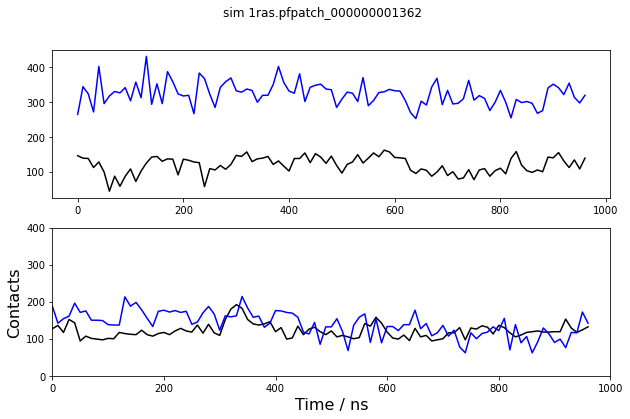

<Figure size 1080x576 with 0 Axes>

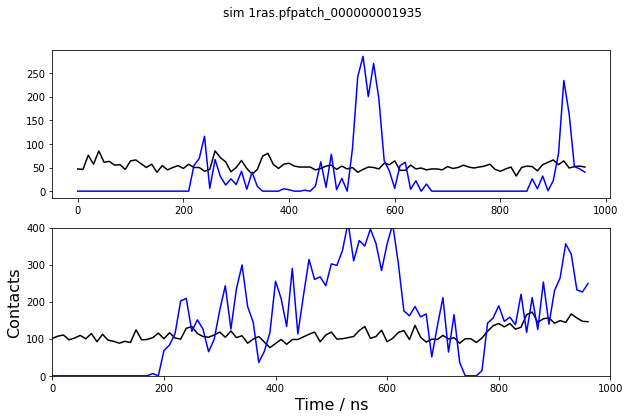

<Figure size 1080x576 with 0 Axes>

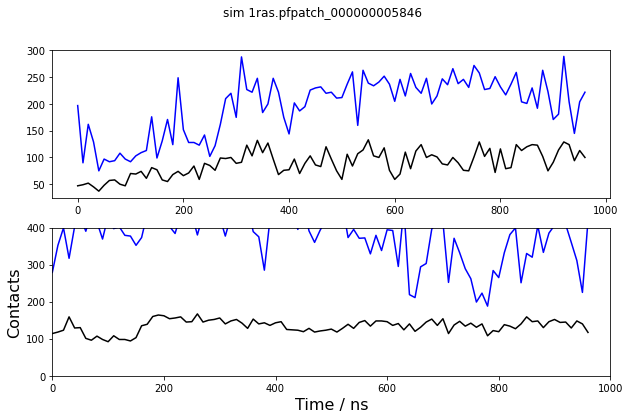

<Figure size 1080x576 with 0 Axes>

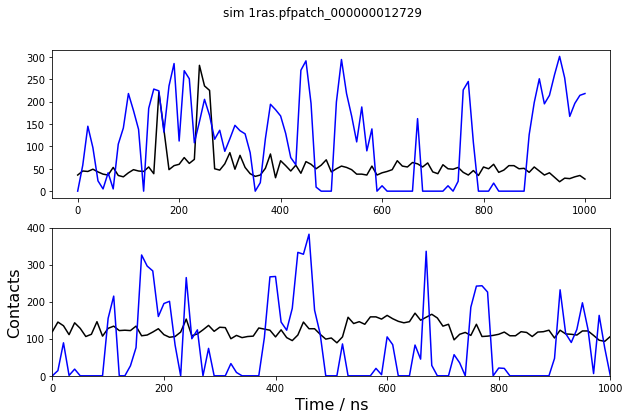

<Figure size 1080x576 with 0 Axes>

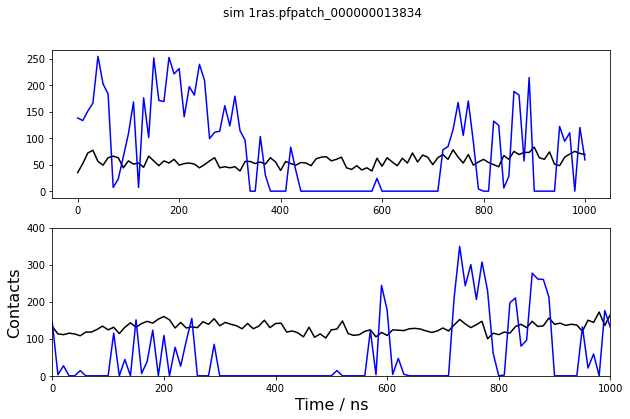

<Figure size 1080x576 with 0 Axes>

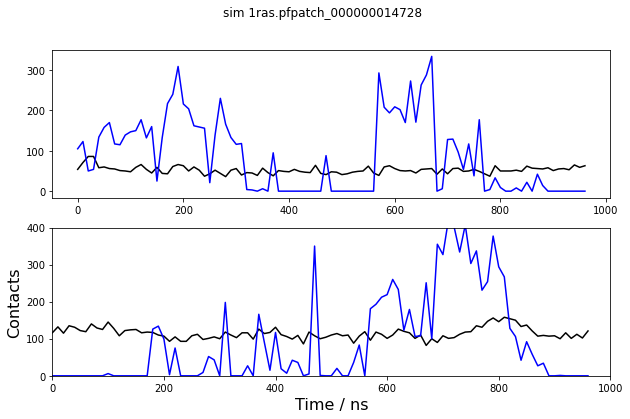

<Figure size 1080x576 with 0 Axes>

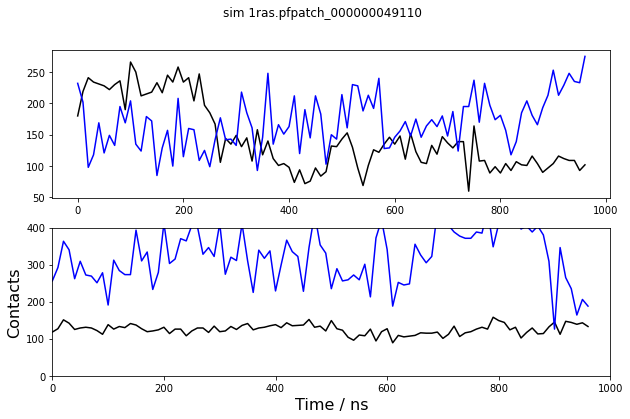

<Figure size 1080x576 with 0 Axes>

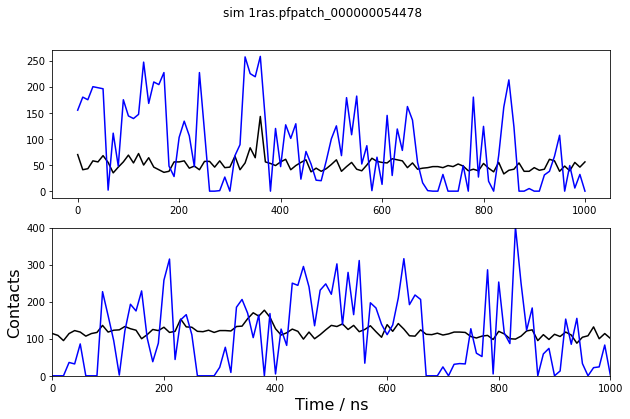

<Figure size 1080x576 with 0 Axes>

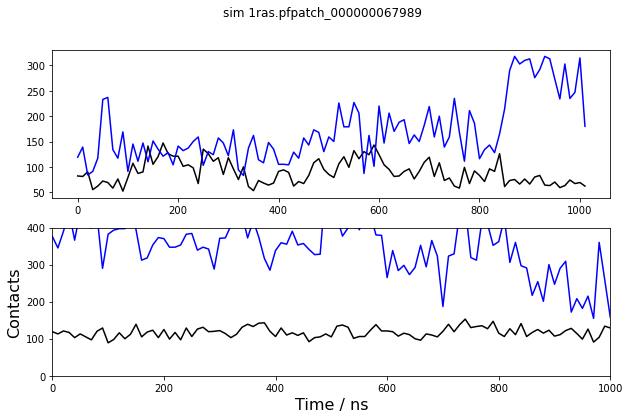

<Figure size 1080x576 with 0 Axes>

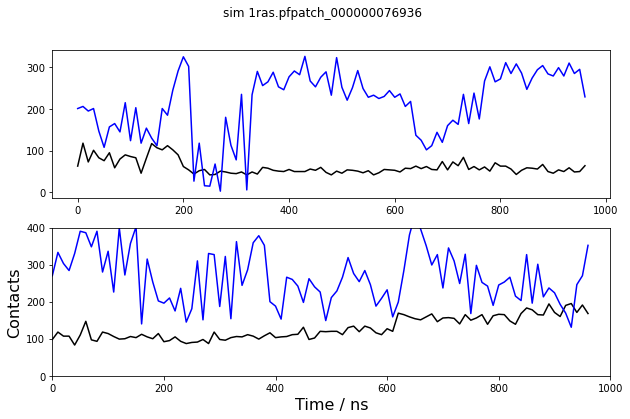

<Figure size 1080x576 with 0 Axes>

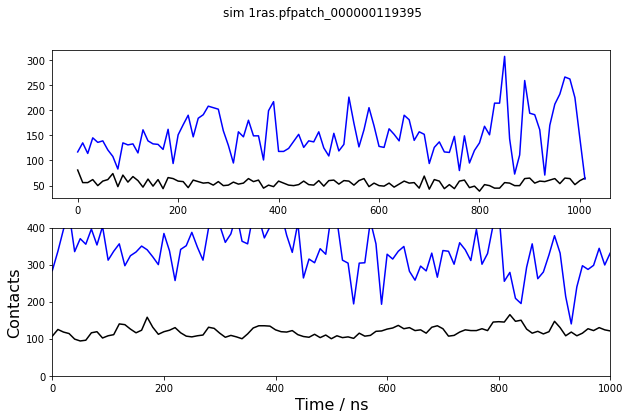

<Figure size 1080x576 with 0 Axes>

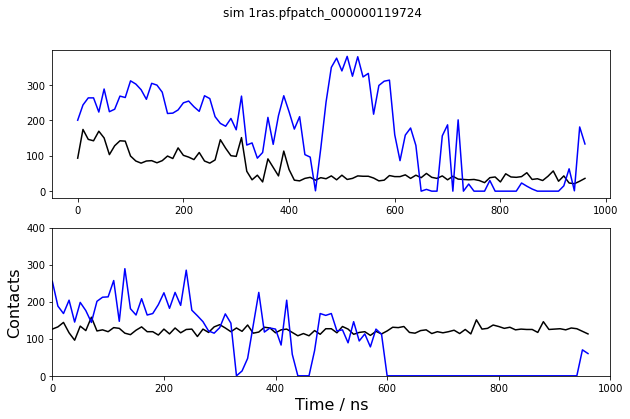

<Figure size 1080x576 with 0 Axes>

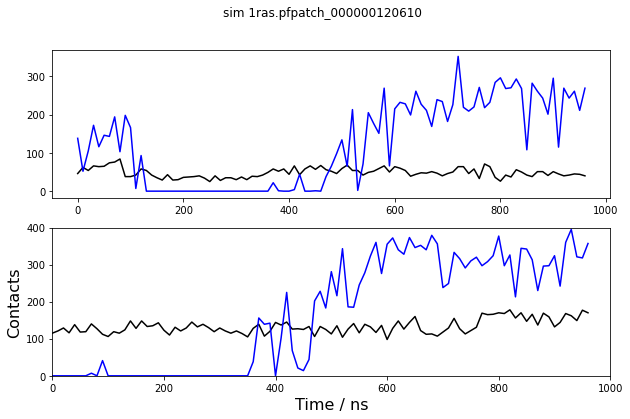

<Figure size 1080x576 with 0 Axes>

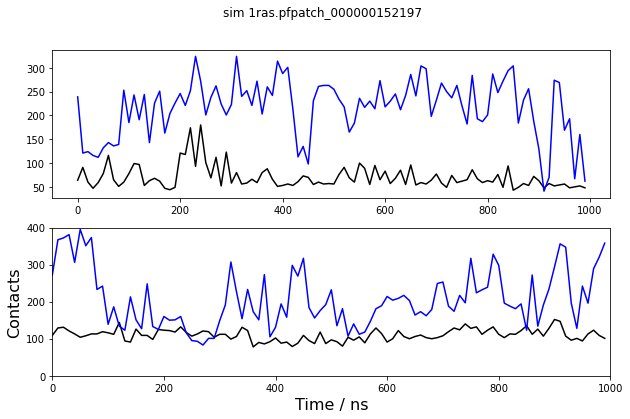

<Figure size 1080x576 with 0 Axes>

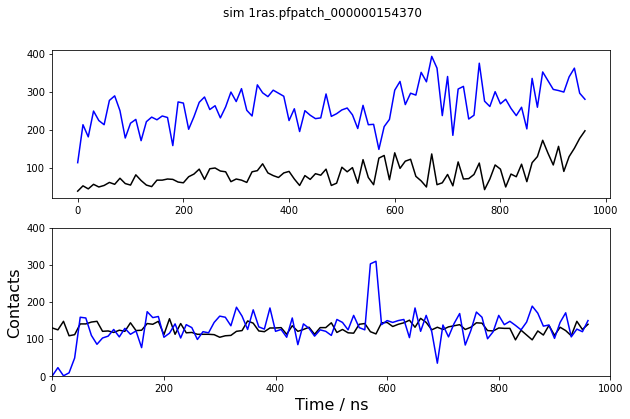

<Figure size 1080x576 with 0 Axes>

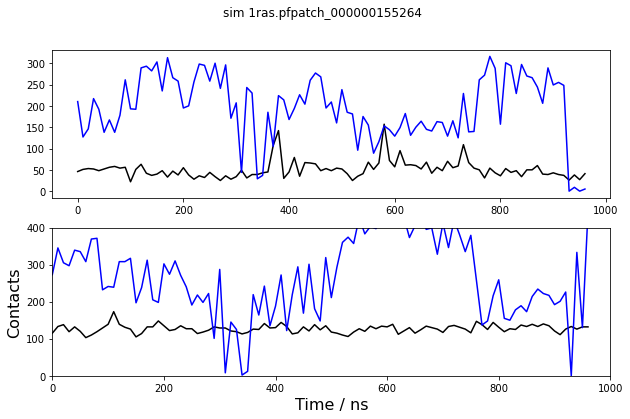

<Figure size 1080x576 with 0 Axes>

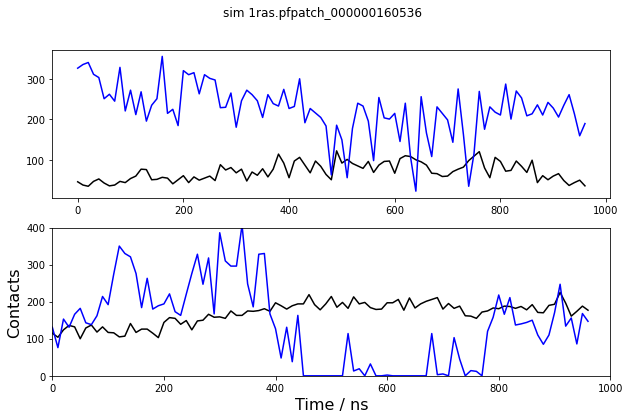

<Figure size 1080x576 with 0 Axes>

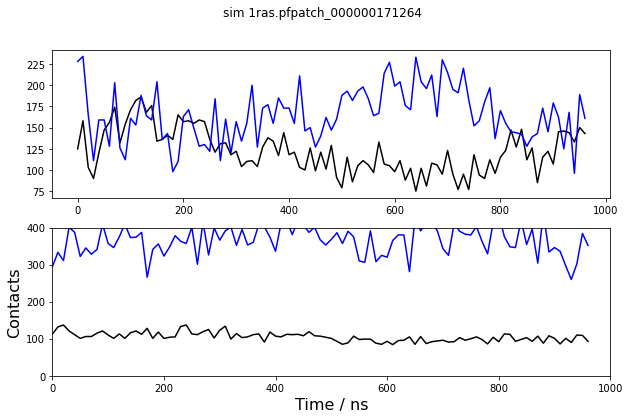

<Figure size 1080x576 with 0 Axes>

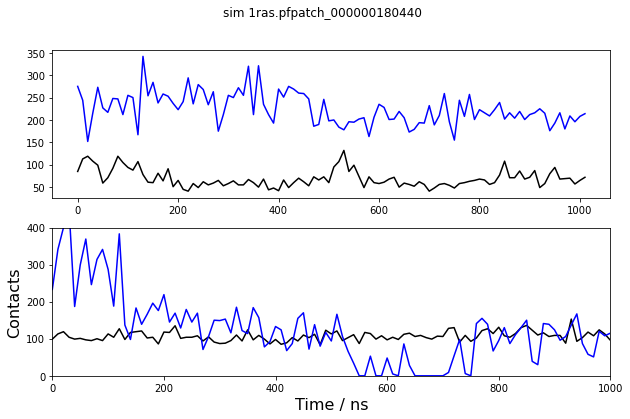

<Figure size 1080x576 with 0 Axes>

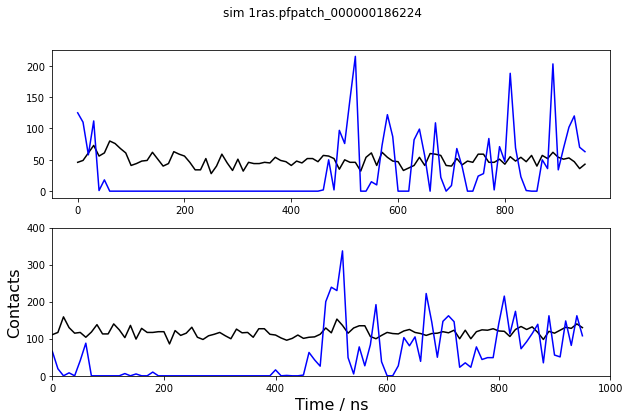

<Figure size 1080x576 with 0 Axes>

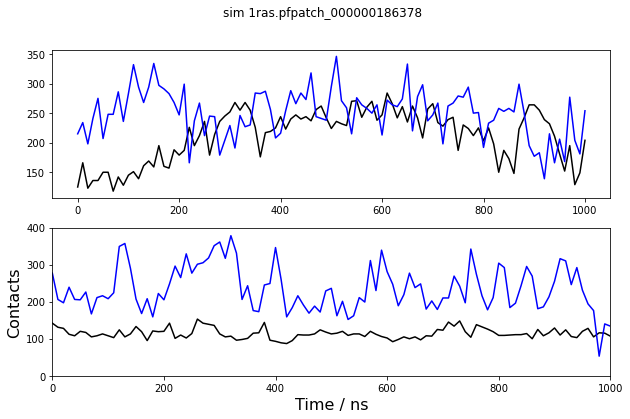

<Figure size 1080x576 with 0 Axes>

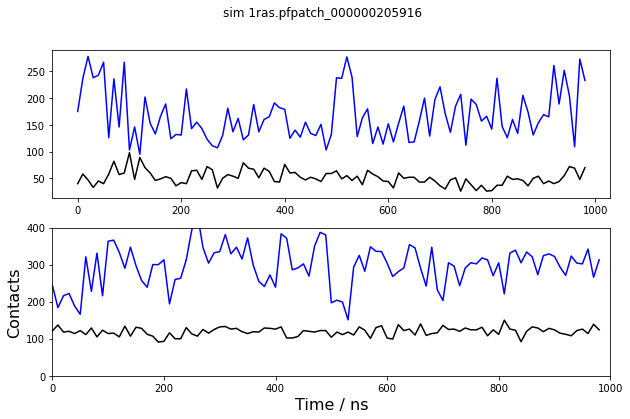

<Figure size 1080x576 with 0 Axes>

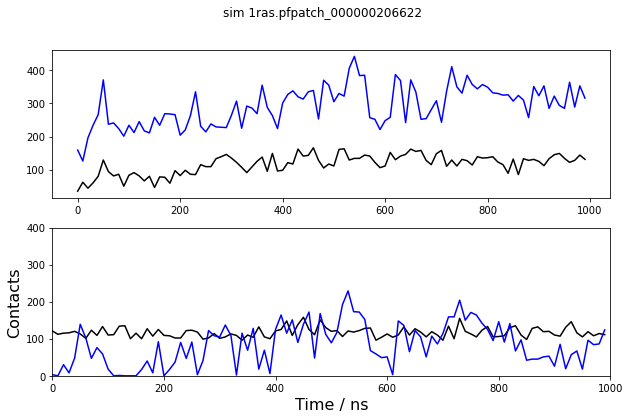

<Figure size 1080x576 with 0 Axes>

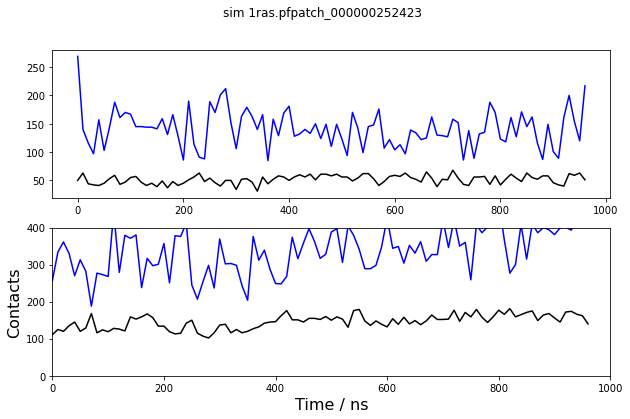

<Figure size 1080x576 with 0 Axes>

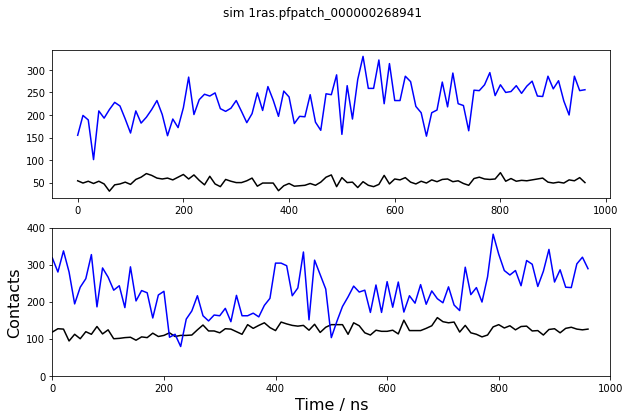

<Figure size 1080x576 with 0 Axes>

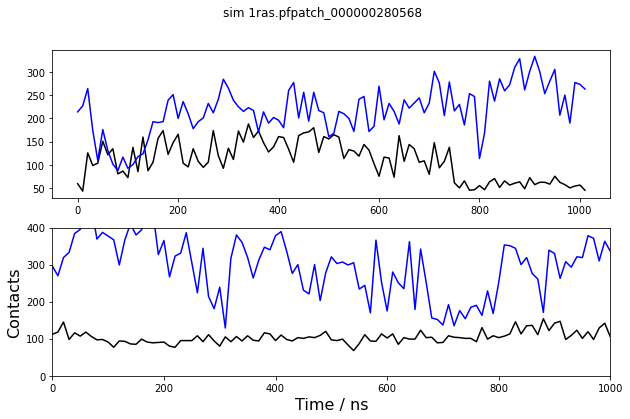

<Figure size 1080x576 with 0 Axes>

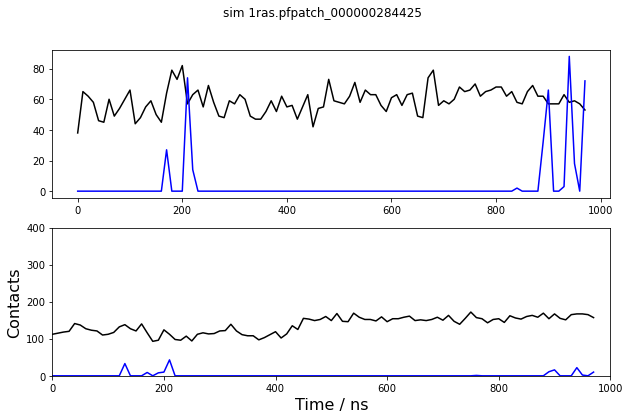

<Figure size 1080x576 with 0 Axes>

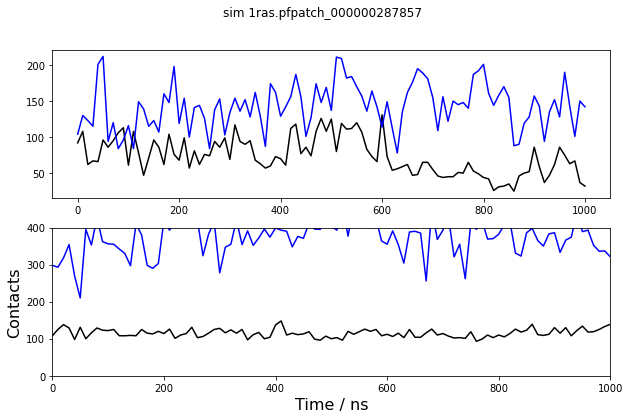

<Figure size 1080x576 with 0 Axes>

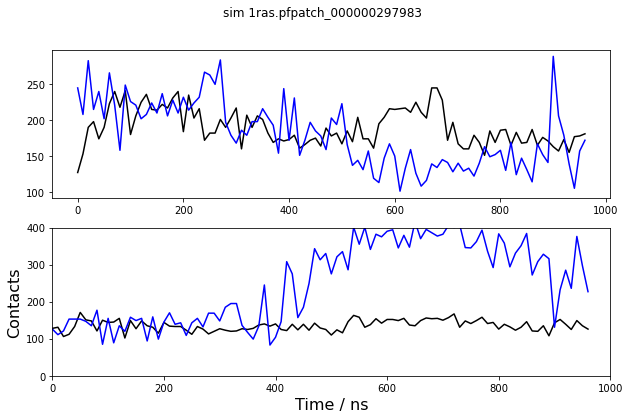

<Figure size 1080x576 with 0 Axes>

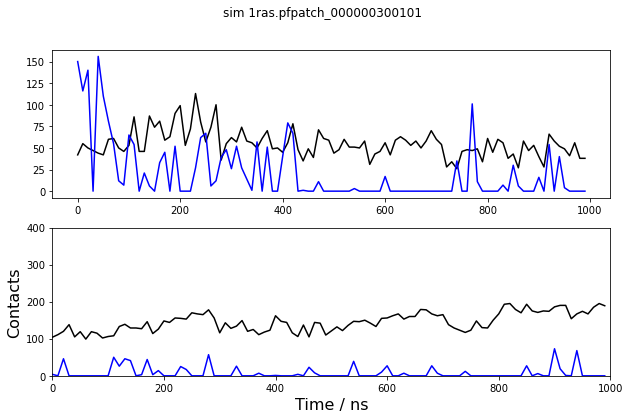

<Figure size 1080x576 with 0 Axes>

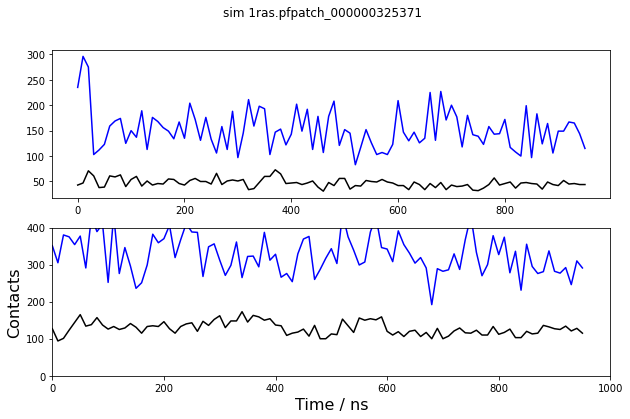

<Figure size 1080x576 with 0 Axes>

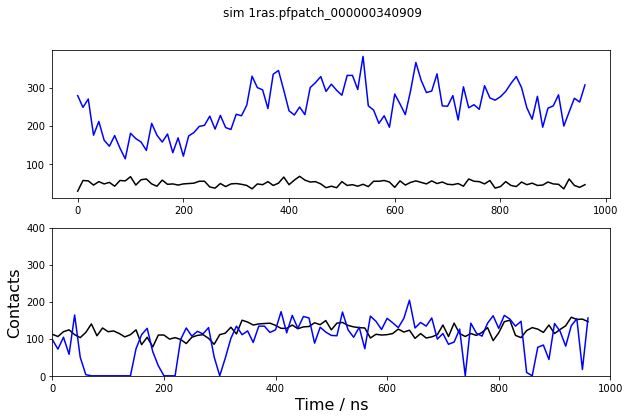

<Figure size 1080x576 with 0 Axes>

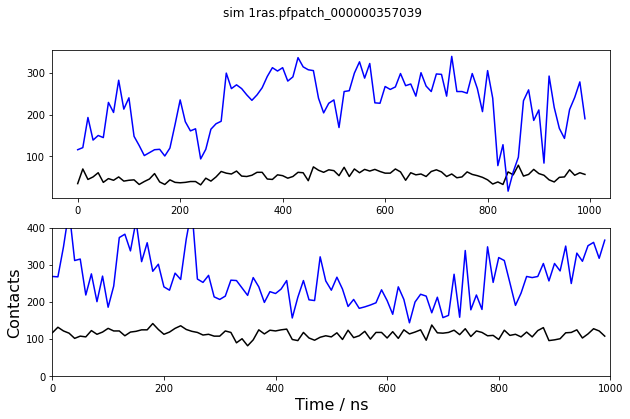

<Figure size 1080x576 with 0 Axes>

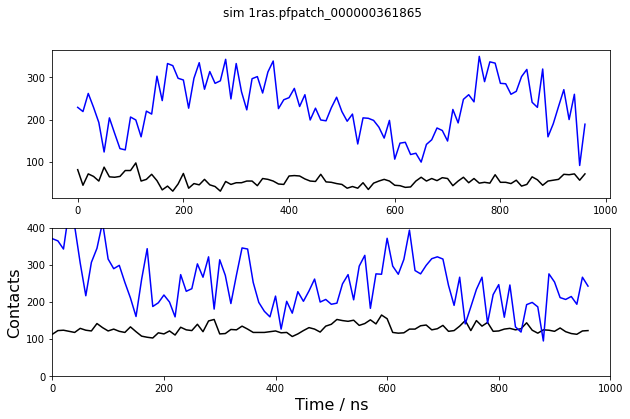

<Figure size 1080x576 with 0 Axes>

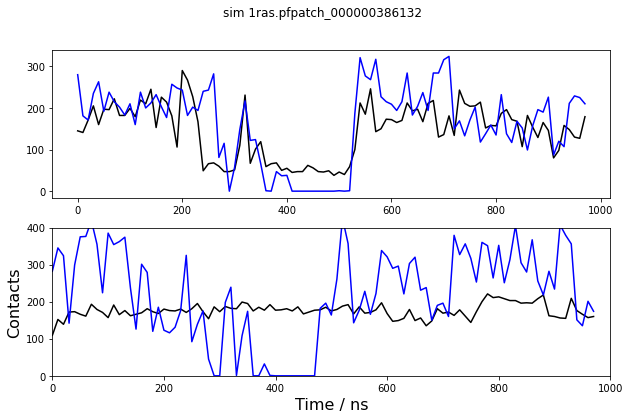

<Figure size 1080x576 with 0 Axes>

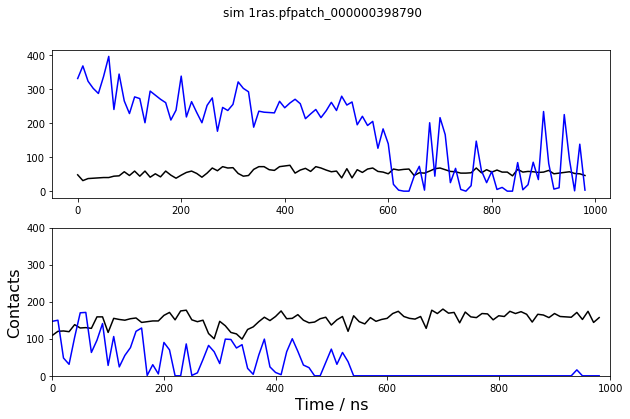

<Figure size 1080x576 with 0 Axes>

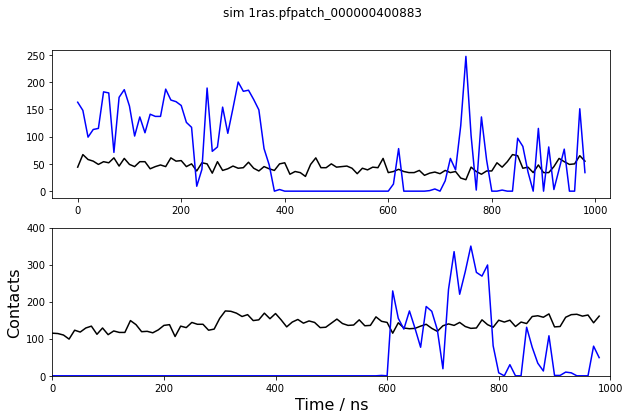

<Figure size 1080x576 with 0 Axes>

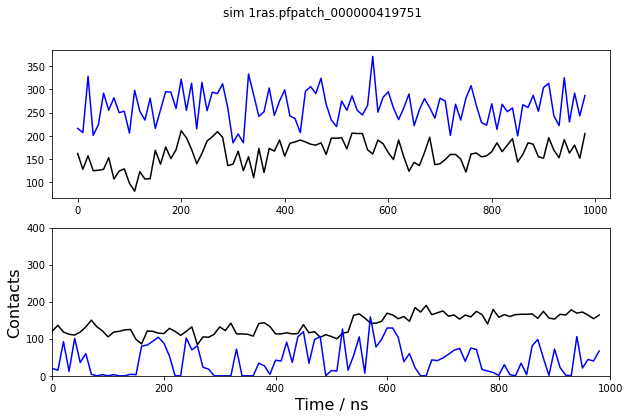

<Figure size 1080x576 with 0 Axes>

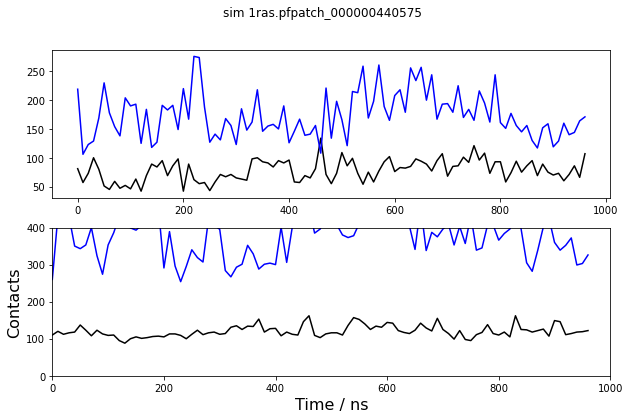

<Figure size 1080x576 with 0 Axes>

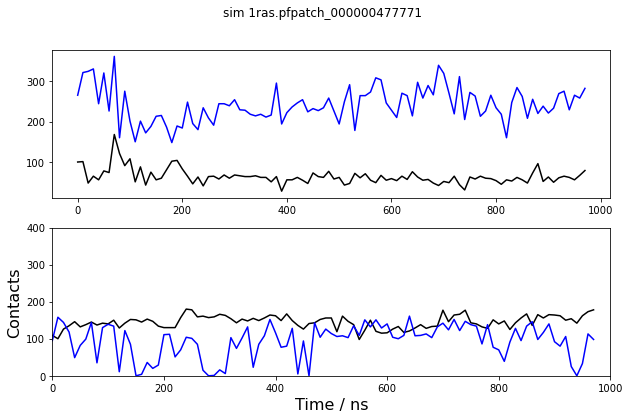

<Figure size 1080x576 with 0 Axes>

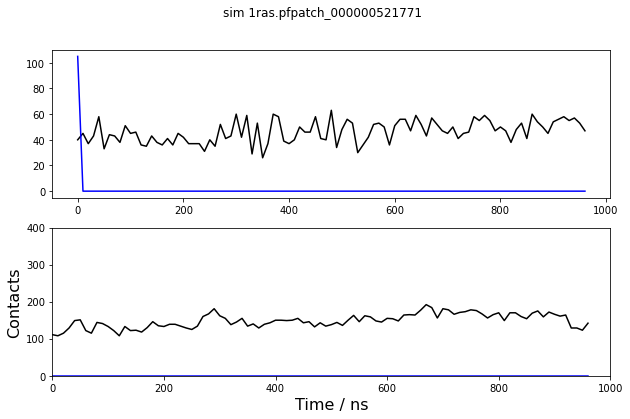

<Figure size 1080x576 with 0 Axes>

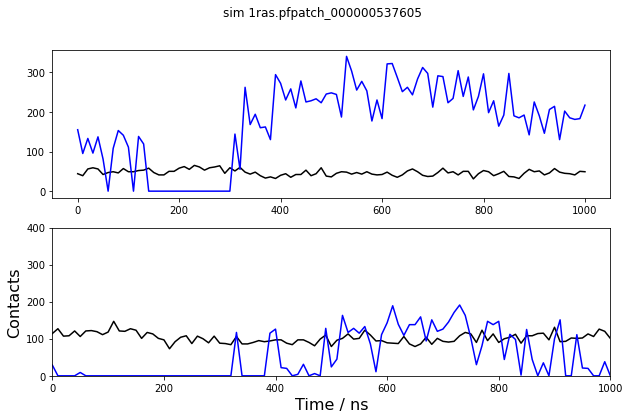

<Figure size 1080x576 with 0 Axes>

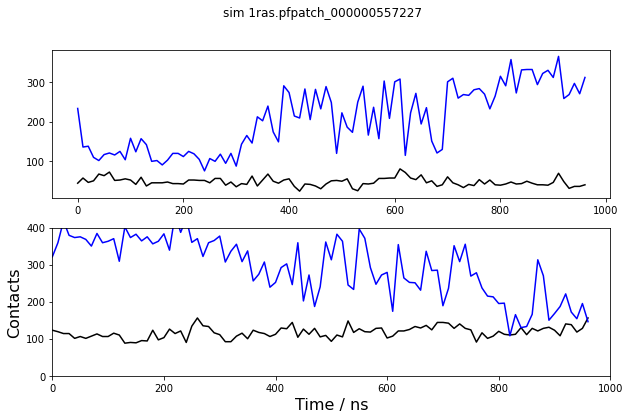

<Figure size 1080x576 with 0 Axes>

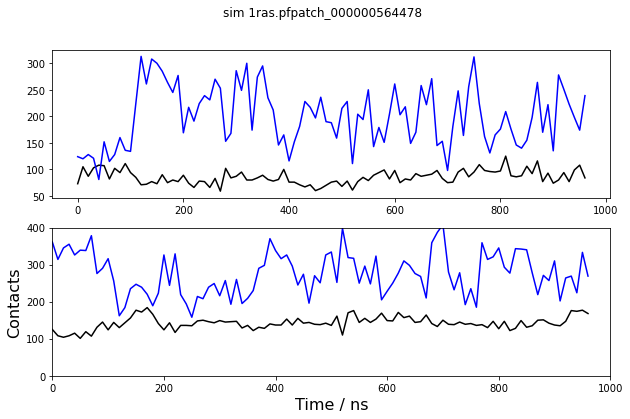

<Figure size 1080x576 with 0 Axes>

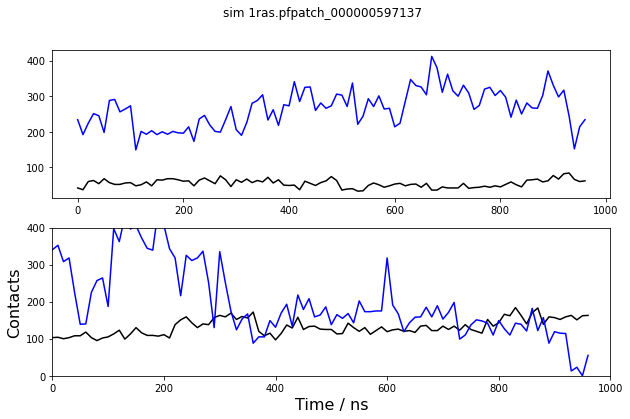

<Figure size 1080x576 with 0 Axes>

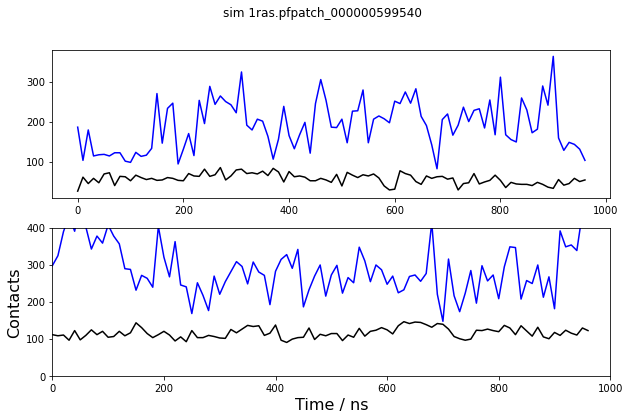

<Figure size 1080x576 with 0 Axes>

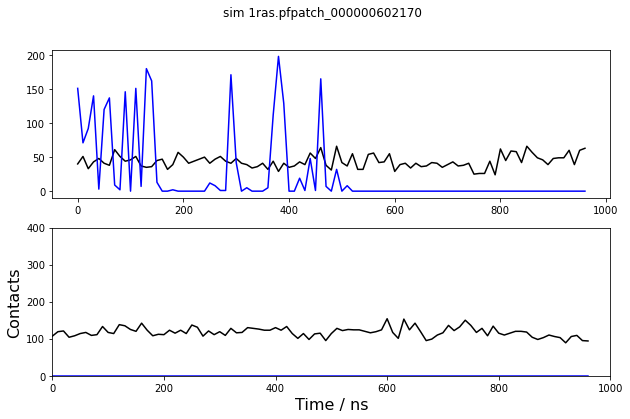

<Figure size 1080x576 with 0 Axes>

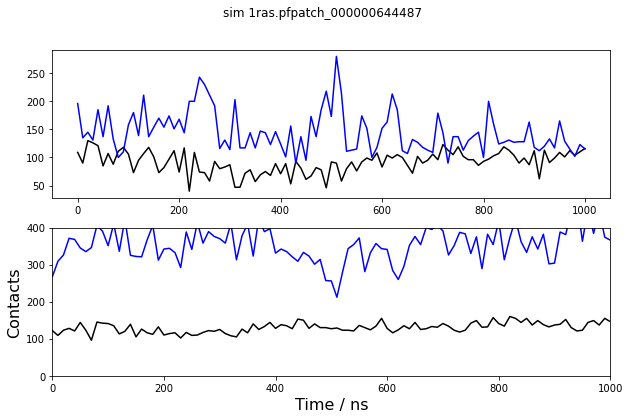

<Figure size 1080x576 with 0 Axes>

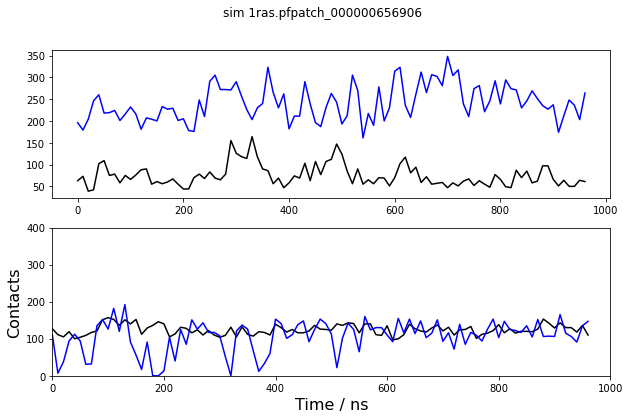

<Figure size 1080x576 with 0 Axes>

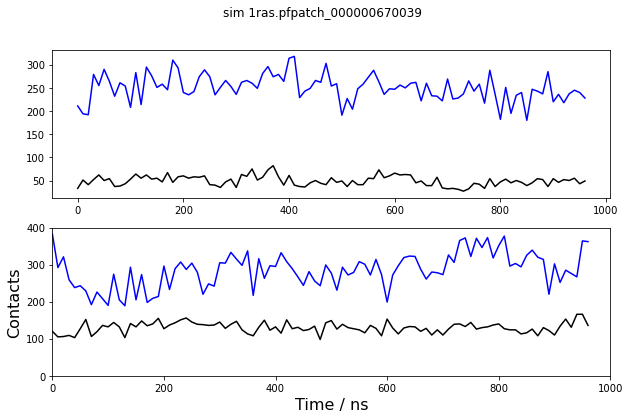

In [12]:
# plot all data
import matplotlib
import matplotlib.pyplot as plt
for i in range(len(allnames)):
    print(f'Plot restuls for sim {allnames[i]} number {i}')
    plt.figure(figsize=(15, 8))
    fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6))
    fig.suptitle(f'sim {allnames[i]}')
    # plot RAF 
    x = allresult[i,:,0] * 0.5
    y = allresult[i,:,1]
    #ax1.plot(x, y, '.', color='black');
    ax1.plot(x, y, color='black');
    y = allresult[i,:,2]
    ax1.plot(x, y, color='blue');

    # plot 14-3-3
    y = allresult[i,:,3]
    ax2.plot(x, y, color='black');
    y = allresult[i,:,4]
    ax2.plot(x, y, color='blue');

    plt.ylabel('Contacts', fontsize=16) 
    plt.xlabel('Time / ns', fontsize=16)

    plt.yticks(np.arange(0, 401, step=100))
    plt.xticks(np.arange(0, 1001, step=200))
    plt.xlim([0, 1000])
    plt.ylim([0, 400])
    #fig.savefig("cfull_all_contacts_residue_8-10us.eps", bbox_inches='tight')
    fig.savefig(os.path.join(cdir, f'{allnames[i]}_plot.pdf'), bbox_inches='tight')


<Figure size 1080x576 with 0 Axes>

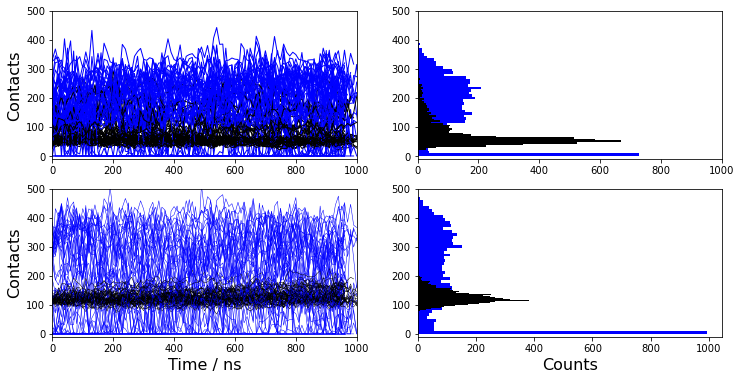

In [13]:
# plot combined
import matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
fig, axs = plt.subplots(2,2, figsize=(12, 6))
for i in range(len(allnames)):
    # plot RAF 
    x = allresult[i,:,0] * 0.5
    y = allresult[i,:,2]
    axs[0,0].plot(x, y, lw=1, color='blue');
    y = allresult[i,:,1]
    axs[0,0].plot(x, y, lw=1, color='black');

    # plot 14-3-3
    y = allresult[i,:,4]
    axs[1,0].plot(x, y, lw=0.5, color='blue');
    y = allresult[i,:,3]
    axs[1,0].plot(x, y, lw=0.5, color='black');

axs[0,1].hist(allresult[:,:,2].flatten(), bins=50, orientation='horizontal', color='blue')
axs[0,1].hist(allresult[:,:,1].flatten(), bins=50, orientation='horizontal', color='black')
axs[1,1].hist(allresult[:,:,4].flatten(), bins=50, orientation='horizontal', color='blue')
axs[1,1].hist(allresult[:,:,3].flatten(), bins=50, orientation='horizontal', color='black')

axs[0,0].set_ylabel('Contacts', fontsize=16) 
axs[1,0].set_ylabel('Contacts', fontsize=16) 
axs[1,0].set_xlabel('Time / ns', fontsize=16)
axs[1,1].set_xlabel('Counts', fontsize=16)
axs[0,0].set_yticks(np.arange(0, 501, step=100))
axs[0,0].set_xticks(np.arange(0, 1001, step=200))
axs[1,0].set_yticks(np.arange(0, 501, step=100))
axs[1,0].set_xticks(np.arange(0, 1001, step=200))
axs[0,1].set_yticks(np.arange(0, 501, step=100))
axs[0,1].set_xticks(np.arange(0, 1001, step=200))
axs[1,1].set_yticks(np.arange(0, 501, step=100))
axs[1,1].set_xticks(np.arange(0, 1001, step=200))
axs[0,0].set_xlim([0, 1000])
axs[0,0].set_ylim([-10, 500])
axs[1,0].set_xlim([0, 1000])
axs[1,0].set_ylim([-10, 500])
#axs[0,1].set_xlim([0, 1000])
axs[0,1].set_ylim([-10, 500])
#axs[1,1].set_xlim([0, 1000])
axs[1,1].set_ylim([-10, 500])
#fig.savefig("cfull_all_contacts_residue_8-10us.eps", bbox_inches='tight')
fig.savefig(os.path.join(cdir, f'combined_plot.pdf'), bbox_inches='tight')

In [69]:
# find a few good hits
allresult.shape
allresult[0,1,:] # last cell is [frame ns, RAF overlapp RAS, overlapp RAF membrane, 14-3-2 overlapp RAS, 14-3-2 overlapp membrane]
total = np.count_nonzero(~np.isnan(allresult[:,:,0])) # 4919 non nan values - or frames
retindex = np.where(allresult[:,:,1] < 90) # 3725 or 75% 
RAS_RAF_90 = len(retindex[0]) / total
retindex = np.where(allresult[:,:,3] < 150) # 4141 or 84% 
RAS_1433_150 = len(retindex[0]) / total
retindex = np.where(allresult[:,:,2] < 10) # 734 or 15% 
mem_RAF_10 = len(retindex[0]) / total
retindex = np.where(allresult[:,:,4] < 10) # 990 or 20% 
mem_1433_10 = len(retindex[0]) / total
# now all together
retindex = np.where((allresult[:,:,1] < 90) & (allresult[:,:,3] < 150) & (allresult[:,:,2] < 10) & (allresult[:,:,4] < 10))
combined = len(retindex[0]) / total
# 441 or 9%  retindex[0] is the simulations retindex[1] is the frames on those simulations 
np. count_nonzero(np.unique(retindex[0]))
# 441 frames of 4919 from 16 simulations 
# Print x5 viables once 
for i in [0, 100, 200, 300, 413]:
    print(f'index {i} sim {allnames[retindex[0][i]]} frame {retindex[1][i]} {allresult[retindex[0][i],retindex[1][i],0]} ns RAF-RAS {allresult[retindex[0][i],retindex[1][i],1]} RAF-mem {allresult[retindex[0][i],retindex[1][i],2]} 1433-RAS {allresult[retindex[0][i],retindex[1][i],3]} 1433-mem {allresult[retindex[0][i],retindex[1][i],4]}')


index 0 sim 1ras.pfpatch_000000001935 frame 0 0.0 ns RAF-RAS 47.0 RAF-mem 0.0 1433-RAS 101.0 1433-mem 0.0
index 100 sim 1ras.pfpatch_000000014728 frame 96 1920.0 ns RAF-RAS 63.0 RAF-mem 0.0 1433-RAS 121.0 1433-mem 0.0
index 200 sim 1ras.pfpatch_000000284425 frame 1 20.0 ns RAF-RAS 65.0 RAF-mem 0.0 1433-RAS 115.0 1433-mem 0.0
index 300 sim 1ras.pfpatch_000000521771 frame 2 40.0 ns RAF-RAS 37.0 RAF-mem 0.0 1433-RAS 115.0 1433-mem 0.0
index 413 sim 1ras.pfpatch_000000602170 frame 68 1360.0 ns RAF-RAS 41.0 RAF-mem 0.0 1433-RAS 99.0 1433-mem 0.0
